## Traitement des données
Importation des données

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_pacf
from numpy.polynomial.polynomial import polyfit

# Charger les données depuis les fichiers CSV
dailycrypto = pd.read_csv("C:\\Users\\jeanb\\Documents\\M2_272\\TOBAM\\daily_crypto_data.csv")
Mktcapvol = pd.read_csv("C:\\Users\\jeanb\\Documents\\M2_272\\TOBAM\\market_caps_daily.csv")
volumebinance = pd.read_csv("C:\\Users\\jeanb\\Documents\\M2_272\\TOBAM\\volume_binance_daily.csv")

# Extraire les données en tant qu'arrays
Mktcapvoldata = Mktcapvol.iloc[:, 1:].values
volumebinancedata = volumebinance.iloc[:, 1:].values
dailycryptodata = dailycrypto.iloc[:, 1:].values

Récupération des rendements en continue des daily cryptos 

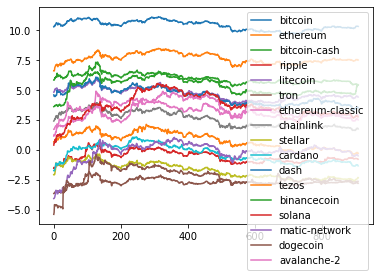

In [104]:
# Nombre de colonnes dans dailycrypto
nbcol = dailycrypto.shape[1]

# Calcul des rendements quotidiens en utilisant la différence des logarithmes
rdtdaily = np.diff(np.log(dailycryptodata), axis=0)

# Récupération du nom des colonnes
nomsColonnesString = 'bitcoin,ethereum,bitcoin-cash,ripple,litecoin,tron,ethereum-classic,chainlink,stellar,cardano,dash,tezos,binancecoin,solana,matic-network,dogecoin,avalanche-2'
cellulesNomsColonnes = nomsColonnesString.split(',')
nomsColonnes = [col.strip() for col in cellulesNomsColonnes]
#mise en forme des rendements en DataFrame
dfrdt=pd.DataFrame(rdtdaily)
dfrdt.columns=nomsColonnes
# Représentation graphique des prix en logarithme
plt.plot(np.log(dailycryptodata))
plt.legend(nomsColonnes)
plt.show()

Représentation de la distribution des rendements 

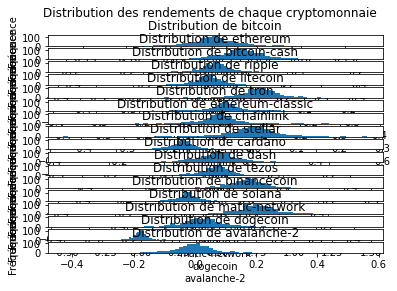

In [105]:
# Créer une nouvelle figure
plt.figure()

# Nombre total de colonnes
nbColonnes = rdtdaily.shape[1]

# Boucle pour créer les subplots
for i in range(1, nbColonnes+1):
    plt.subplot(nbColonnes, 1, i)
    
    # Afficher l'histogramme de la colonne actuelle
    plt.hist(rdtdaily[:, i-1], bins='auto')
    
    # Ajouter des étiquettes et un titre
    plt.xlabel(nomsColonnes[i-1])
    plt.ylabel('Fréquence')
    plt.title(f'Distribution de {nomsColonnes[i-1]}')

# Ajuster la disposition
plt.suptitle('Distribution des rendements de chaque cryptomonnaie')
plt.show()

Statistique sur les rendements

In [107]:
# Calcul de la kurtosis et de la skewness
kurtosisrdt_values = dfrdt.kurtosis()
skewnessrdt_values = dfrdt.skew()

# Utilisation de la méthode describe() suivie de l'ajout de kurtosis et skewness
descriptionrdt_with_kurtosis_skewness = dfrdt.describe().append(kurtosisrdt_values.rename('kurtosis')).append(skewnessrdt_values.rename('skewness'))
descriptionrdt_with_kurtosis_skewness

,bitcoin,ethereum,bitcoin-cash,ripple,litecoin,tron,ethereum-classic,chainlink,stellar,cardano,dash,tezos,binancecoin,solana,matic-network,dogecoin,avalanche-2
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,0.000040,0.000997,-0.000463,0.000820,-0.000447,0.001112,0.001239,-0.000726,-0.000271,0.000421,-0.001189,-0.001073,0.002001,0.002592,0.003909,0.002846,0.001483
std,0.036000,0.047195,0.054932,0.057463,0.051493,0.048173,0.064133,0.058667,0.051990,0.053645,0.059445,0.060208,0.053749,0.071140,0.074533,0.092064,0.072151
min,-0.172520,-0.305201,-0.420152,-0.386534,-0.437879,-0.376819,-0.393744,-0.440791,-0.360120,-0.282512,-0.455394,-0.440800,-0.383952,-0.548166,-0.367780,-0.507072,-0.430871
25%,-0.015881,-0.021432,-0.024001,-0.023456,-0.023530,-0.017974,-0.026691,-0.030687,-0.023128,-0.027356,-0.028392,-0.029243,-0.018036,-0.032569,-0.033191,-0.029778,-0.034493
50%,-0.000242,0.001428,0.001813,0.000802,0.001111,0.001976,0.000594,0.002247,0.001237,-0.000052,0.001967,0.001788,0.001067,0.000026,0.000241,-0.001092,0.000508
75%,0.017776,0.027013,0.023142,0.024123,0.026366,0.019526,0.024833,0.031191,0.021861,0.023736,0.027637,0.030356,0.022129,0.035823,0.032059,0.022581,0.034140
max,0.176026,0.219406,0.423107,0.423353,0.241759,0.334110,0.369295,0.265253,0.555064,0.269196,0.451889,0.291551,0.552656,0.312073,0.436540,1.479104,0.563596
kurtosis,3.063725,4.349208,11.696097,10.319350,7.734654,9.977991,7.018653,4.646598,18.344312,3.471649,9.320490,5.135269,18.678352,7.283288,6.704584,82.059024,7.384091
skewness,-0.200806,-0.434633,0.337183,0.608753,-0.963975,-0.074339,0.702308,-0.616950,0.877822,0.334251,-0.152742,-0.394264,1.004497,-0.463435,1.082807,5.524318,0.559565


Statistiques sur les capitalisations en log

In [108]:
capi=pd.DataFrame(np.log(Mktcapvoldata))
capi.columns=nomsColonnes
# Calcul de la kurtosis et de la skewness
kurtosiscapi_values = capi.kurtosis()
skewnesscapi_values = capi.skew()

# Utilisation de la méthode describe() suivie de l'ajout de kurtosis et skewness
descriptioncapi_with_kurtosis_skewness =capi.describe().append(kurtosiscapi_values.rename('kurtosis')).append(skewnesscapi_values.rename('skewness'))
descriptioncapi_with_kurtosis_skewness

,bitcoin,ethereum,bitcoin-cash,ripple,litecoin,tron,ethereum-classic,chainlink,stellar,cardano,dash,tezos,binancecoin,solana,matic-network,dogecoin,avalanche-2
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,27.159082,26.232886,22.340463,24.049923,22.762793,22.488240,22.002324,22.533433,22.232570,23.912985,20.702973,21.429659,24.630643,23.208806,22.512837,23.376789,22.529319
std,0.384120,0.394095,0.740855,0.432540,0.462177,0.294104,0.576360,0.595984,0.572017,0.665633,0.641100,0.629795,0.523042,1.038159,0.986804,0.744786,0.865074
min,26.433573,25.145643,21.255250,23.024542,21.839087,21.374932,20.304529,21.695719,21.345405,22.420613,19.609875,20.304916,22.429423,18.060669,18.253814,20.208913,19.273050
25%,26.817879,25.959938,21.565869,23.698505,22.422301,22.411320,21.698278,21.953359,21.702987,23.323313,20.080224,20.856061,24.516052,22.771111,22.474382,22.942585,22.087372
50%,27.174791,26.141209,22.462600,23.968652,22.737670,22.535486,21.972271,22.572982,22.263534,23.804965,20.720618,21.515489,24.630620,23.125642,22.805173,23.215708,22.423967
75%,27.490281,26.581219,23.013421,24.395414,23.141236,22.646016,22.435132,23.123411,22.752516,24.463690,21.273659,21.946312,24.914998,24.072213,23.052573,23.939523,23.255291
max,27.876942,27.071820,24.086262,25.158704,23.968891,23.201539,23.566117,23.816007,23.544526,25.277182,22.221089,22.722637,25.427749,25.072605,23.706481,25.209594,24.126672
kurtosis,-1.144606,-0.860861,-1.466055,-0.754836,-0.825091,3.439746,0.165691,-1.502390,-1.307829,-1.234454,-1.223943,-1.209523,7.590662,3.020910,5.924638,2.406453,0.617640
skewness,-0.099870,0.243062,0.106828,0.318491,0.086862,-1.483336,-0.377376,0.193947,0.207210,0.194684,0.221098,0.005939,-2.375796,-0.881256,-2.419460,-0.782108,-0.306082


Statistiques sur les volumes en log

In [109]:
volume=pd.DataFrame(np.log(volumebinancedata))
volume.columns=nomsColonnes
# Calcul de la kurtosis et de la skewness
kurtosisvolume_values = volume.kurtosis()
skewnessvolume_values = volume.skew()

# Utilisation de la méthode describe() suivie de l'ajout de kurtosis et skewness
descriptionvolume_with_kurtosis_skewness = volume.describe().append(kurtosisvolume_values.rename('kurtosis')).append(skewnessvolume_values.rename('skewness'))
descriptionvolume_with_kurtosis_skewness

,bitcoin,ethereum,bitcoin-cash,ripple,litecoin,tron,ethereum-classic,chainlink,stellar,cardano,dash,tezos,binancecoin,solana,matic-network,dogecoin,avalanche-2
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,24.118705,23.526234,20.861457,21.646200,20.898365,20.534247,20.307118,20.295643,19.361599,20.803854,19.118111,18.376026,20.952754,20.512887,20.167831,20.723270,19.667063
std,0.538630,0.669001,1.447044,0.869762,1.086729,0.894741,1.392086,0.876839,1.259857,1.112167,1.158344,1.204325,0.892319,1.037646,0.911892,1.083309,0.967070
min,22.079710,21.502499,17.497970,19.260619,18.962188,18.625566,17.392960,17.907810,16.930136,18.305118,16.811808,16.073514,16.692712,16.655254,16.200665,18.664527,16.752356
25%,23.798102,23.062505,19.914783,20.978980,20.038999,19.718940,19.177674,19.689234,18.307509,19.916266,18.154139,17.331326,20.395833,19.832120,19.657405,19.897136,18.884997
50%,24.126461,23.558121,20.898683,21.678455,20.510741,20.577711,20.204187,20.275238,19.315382,20.737857,18.950950,18.408457,20.977292,20.636451,20.179608,20.612161,19.718819
75%,24.471893,23.980886,22.168635,22.179629,21.703485,21.167530,21.470594,20.932649,20.284625,21.706039,20.001053,19.291770,21.465775,21.248072,20.713009,21.306218,20.409127
max,25.910060,25.671363,23.667869,24.857922,23.632916,23.289655,24.729137,22.418220,23.071665,23.581804,22.408131,21.705103,23.819003,23.505129,23.108439,24.654320,21.920403
kurtosis,0.225994,0.010109,-0.765201,0.129394,-0.732111,-0.517699,-0.903054,-0.535790,-0.768456,-0.820481,-0.793720,-0.890796,1.370150,0.117903,1.567637,0.624716,-0.635684
skewness,-0.210121,-0.059922,-0.285811,0.349235,0.605249,0.288268,0.165568,-0.052475,0.215305,0.124040,0.355499,0.115325,-0.287599,-0.456436,-0.267699,0.823499,-0.149870


Statistiques sur les prix 

In [110]:
Prix=pd.DataFrame(dailycryptodata)
Prix.columns=nomsColonnes
# Calcul de la kurtosis et de la skewness
kurtosisprix_values = Prix.kurtosis()
skewnessprix_values = Prix.skew()

# Utilisation de la méthode describe() suivie de l'ajout de kurtosis et skewness
descriptionprix_with_kurtosis_skewness = Prix.describe().append(kurtosisprix_values.rename('kurtosis')).append(skewnessprix_values.rename('skewness'))
descriptionprix_with_kurtosis_skewness

,bitcoin,ethereum,bitcoin-cash,ripple,litecoin,tron,ethereum-classic,chainlink,stellar,cardano,dash,tezos,binancecoin,solana,matic-network,dogecoin,avalanche-2
count,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,35397.991175,2254.046016,347.599773,0.641181,124.249104,0.071338,31.785902,16.183454,0.222116,0.930444,115.629834,2.890083,341.347442,59.475815,1.061954,0.136923,36.315146
std,13480.134223,932.450139,253.657392,0.312832,62.053203,0.020868,18.411803,10.269342,0.138981,0.647734,79.665732,1.828536,121.664195,58.956902,0.543444,0.100652,29.618432
min,15742.444336,730.147340,88.582560,0.220535,43.291987,0.026840,5.672940,5.115011,0.071337,0.175679,29.030095,0.717070,37.394591,1.515807,0.017591,0.004707,3.206777
25%,23096.474675,1570.091399,120.364788,0.390930,75.997257,0.060939,19.210479,7.042267,0.104705,0.384767,48.203924,1.243267,276.818639,20.881238,0.769125,0.068950,15.707652
50%,33935.295258,1887.702420,299.902408,0.511841,107.524304,0.066321,25.778940,13.767172,0.190064,0.673389,95.571703,2.696162,314.213850,33.475853,0.998218,0.088011,20.671265
75%,46298.230768,2940.451554,528.528668,0.827877,167.395558,0.077533,42.153092,24.918995,0.324024,1.311789,169.811053,4.101751,404.570215,88.981039,1.418357,0.189162,56.919772
max,67617.015545,4815.004634,1547.082465,1.837677,384.671618,0.166178,136.381988,51.851547,0.727540,2.967075,441.964508,8.552076,675.098974,259.239558,2.881712,0.681842,134.469747
kurtosis,-0.947433,-0.320593,2.030607,0.588172,1.070221,2.633508,3.218145,-0.328668,0.363094,0.167820,0.960103,-0.394556,0.779717,1.078627,0.163942,3.717924,0.298152
skewness,0.392794,0.825279,1.194612,1.102205,1.045316,1.224130,1.429117,0.767185,0.963770,0.987973,1.139858,0.751349,0.229177,1.458936,0.372551,1.687529,1.225621


Test de normalité des rendements

A première vue, nous pouvons voir que toutes les Kurtosis des rendements de chaque cryptomonnaies sont largement supérieur à 3, laissant penser que les rendements ne suivent pas une loi normale. Nous allors vérifier celà à l'aide du test de Jarque Bera,

In [60]:
h = np.zeros(nbColonnes)
p = np.zeros(nbColonnes)


for i in range(nbColonnes):
    jbtest_result = stats.jarque_bera(rdtdaily[:, i])
    h[i] = jbtest_result[0]
    p[i] = jbtest_result[1]
    
# Création d'un DataFrame
pd.DataFrame({
    'Jarque-Bera Statistic': h,
    'p-value': p,
},index=nomsColonnes)

,Jarque-Bera Statistic,p-value
bitcoin,356.184637,0.0
ethereum,734.947116,0.0
bitcoin-cash,5135.854374,0.0
ripple,4039.923500,0.0
litecoin,2377.523247,0.0
tron,3725.420400,0.0
ethereum-classic,1916.335355,0.0
chainlink,863.965006,0.0
stellar,12713.092088,0.0
cardano,466.629963,0.0


En faisant, le test de Jarque Bera nous rejetons la normalité des rendements pour toutes les cryptomonnaies à un seuil de 1%

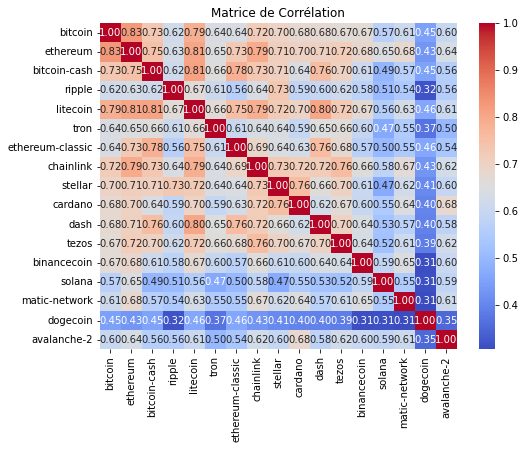

In [61]:
# Données
rdtdaily = np.diff(np.log(dailycryptodata), axis=0)
nomsColonnesString = 'bitcoin,ethereum,bitcoin-cash,ripple,litecoin,tron,ethereum-classic,chainlink,stellar,cardano,dash,tezos,binancecoin,solana,matic-network,dogecoin,avalanche-2'
cellulesNomsColonnes = nomsColonnesString.split(',')
nomsColonnes = [col.strip() for col in cellulesNomsColonnes]

# Calcul de la matrice de corrélation
matriceCorrelation = np.corrcoef(rdtdaily, rowvar=False)

# Ajustement de la taille de la figure
plt.figure(figsize=(8, 6))

# Création du heatmap avec seaborn
sns.heatmap(matriceCorrelation, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=nomsColonnes, yticklabels=nomsColonnes)

# Ajout d'un titre
plt.title('Matrice de Corrélation')

# Affichage de la figure
plt.show()

Nous constatons qu'aucune des cryptomonnaies détiennent des corrélations négatives entre elles, il existe seulement un dégré d'indépendance entre elles. Le niveau de plus faible corrélation est entre le Solana/ le dogecoin et le binancecoin/le dogecoin avec 0.31. Le niveau le plus élevée est entre les deux plus grosses cryptomonnaies (Bitcoin/Ethereum) avec 0.83, que nous allons considérons comme nos cryptomonnaies représentant le marché.

Etude des autocorrélations partielles des rendements

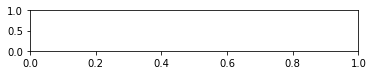

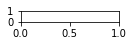

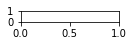

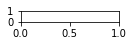

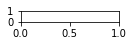

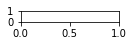

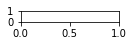

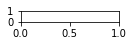

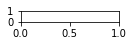

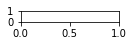

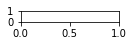

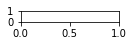

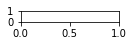

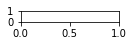

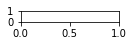

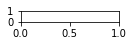

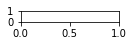

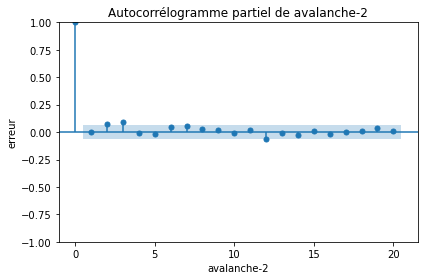

In [62]:

# Ajustement de la taille de la figure
plt.figure(figsize=(20, 15))

# Boucle pour créer les subplots
for i in range(nbColonnes):
    plt.subplot(nbColonnes, 3, i + 1)
    
    # Afficher l'histogramme de la colonne actuelle
    plot_pacf(rdtdaily[:, i], lags=20)
    
    # Ajouter des étiquettes et un titre
    plt.xlabel(nomsColonnes[i])
    plt.ylabel('erreur')
    plt.title(f'Autocorrélogramme partiel de {nomsColonnes[i]}')

# Ajuster la disposition
plt.tight_layout()

# Affichage de la figure
plt.show()


## Les choix diversification 
Dispersion des monnaies par ecart types et moyennes de leur capitalisation, de leur rendement et de leur volume

In [63]:
meanCap = np.mean(Mktcapvoldata, axis=0)
stdCap = np.std(Mktcapvoldata, axis=0)

meanrdt = np.mean(rdtdaily, axis=0)
stdrdt = np.std(rdtdaily, axis=0)

meanVolume = np.mean(volumebinancedata, axis=0)
stdVolume = np.std(volumebinancedata, axis=0)

Diversfication par la capitalisation

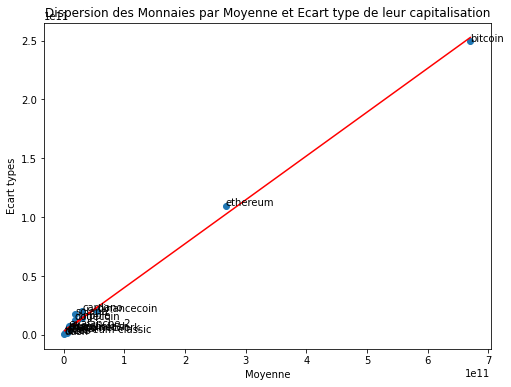

In [64]:
# Tracer un graphe de dispersion
plt.figure(figsize=(8, 6))
plt.scatter(meanCap, stdCap)

# Tracer la droite de régression linéaire
b, m = polyfit(meanCap, stdCap, 1)
plt.plot(meanCap, b + m * meanCap, color='red')

# Ajouter des étiquettes aux points
for i in range(len(nomsColonnes)):
    plt.text(meanCap[i], stdCap[i], nomsColonnes[i])

# Ajouter des étiquettes et un titre
plt.xlabel('Moyenne')
plt.ylabel('Ecart types')
plt.title('Dispersion des Monnaies par Moyenne et Ecart type de leur capitalisation')

plt.show()

A l'échelle logaritmique

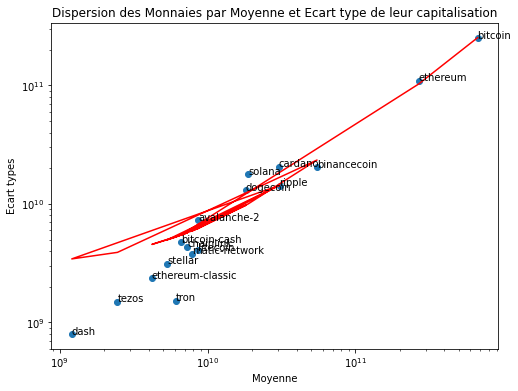

In [65]:

# Tracer un graphe de dispersion
plt.figure(figsize=(8, 6))
plt.scatter(meanCap, stdCap)

# Tracer la droite de régression linéaire
b, m = polyfit(meanCap, stdCap, 1)
plt.plot(meanCap, b + m * meanCap, color='red')

# Ajouter des étiquettes aux points
for i in range(len(nomsColonnes)):
    plt.text(meanCap[i], stdCap[i], nomsColonnes[i])

# Ajouter des étiquettes et un titre
plt.xlabel('Moyenne')
plt.ylabel('Ecart types')
plt.title('Dispersion des Monnaies par Moyenne et Ecart type de leur capitalisation')

# Mettre à l'échelle logarithmique
plt.xscale('log')
plt.yscale('log')

plt.show()


Nous retraçons la droite de régression en supprimant Bitcoin et Ethereum puisque leur capitalisation est largement plus élevée que les autres cryptomonnaies. Ainsi, nous allons les mettre dans une catégorie LargeCap Crypto.

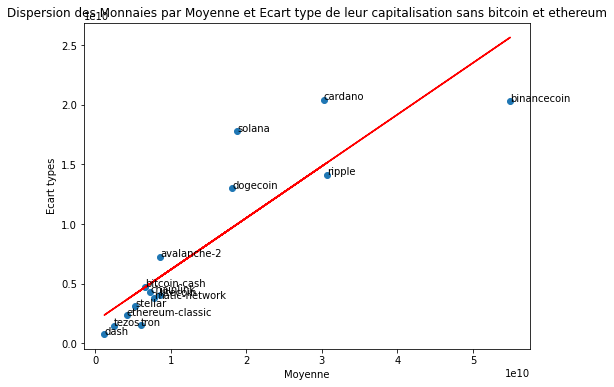

In [66]:

# Tracer un graphe de dispersion sans bitcoin et ethereum
plt.figure(figsize=(8, 6))
plt.scatter(meanCap[2:], stdCap[2:])

# Tracer la droite de régression linéaire
b, m = polyfit(meanCap[2:], stdCap[2:], 1)
plt.plot(meanCap[2:], b + m * meanCap[2:], color='red')

# Ajouter des étiquettes aux points
for i in range(2, len(nomsColonnes)):
    plt.text(meanCap[i], stdCap[i], nomsColonnes[i])

# Ajouter des étiquettes et un titre
plt.xlabel('Moyenne')
plt.ylabel('Ecart types')
plt.title('Dispersion des Monnaies par Moyenne et Ecart type de leur capitalisation sans bitcoin et ethereum')

plt.show()


Au vue de ce graphique nous pouvons mieux discerner les autres capitalisations avec en MidCap (Cardano, BinanceCoin, ripple, solana, Dogecoin, Avanlache-2) et en SmallCap (Bitcoin-cash, chainlink, litecoin, matic-network, stellar,ethereum-classic, tron, tezos, dash)

### Diversification par le volume

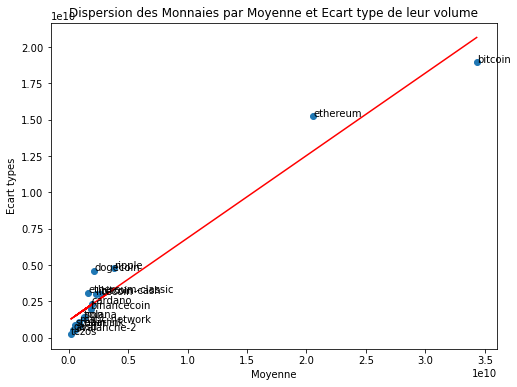

In [67]:

# Tracer un graphe de dispersion du volume
plt.figure(figsize=(8, 6))
plt.scatter(meanVolume, stdVolume)

# Tracer la droite de régression linéaire
b, m = polyfit(meanVolume, stdVolume, 1)
plt.plot(meanVolume, b + m * meanVolume, color='red')

# Ajouter des étiquettes aux points
for i in range(len(nomsColonnes)):
    plt.text(meanVolume[i], stdVolume[i], nomsColonnes[i])

# Ajouter des étiquettes et un titre
plt.xlabel('Moyenne')
plt.ylabel('Ecart types')
plt.title('Dispersion des Monnaies par Moyenne et Ecart type de leur volume')

plt.show()


Des résultats similaires à celui de la régression sur le volume, les plus gros volumes d'échanges sont les plus grosses capitalisations .

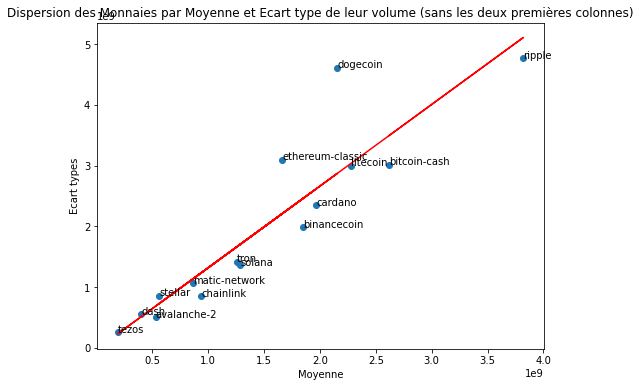

In [68]:

# Tracer un graphe de dispersion du volume sans les deux premières colonnes
plt.figure(figsize=(8, 6))
plt.scatter(meanVolume[2:], stdVolume[2:])

# Tracer la droite de régression linéaire
b, m = polyfit(meanVolume[2:], stdVolume[2:], 1)
plt.plot(meanVolume[2:], b + m * meanVolume[2:], color='red')

# Ajouter des étiquettes aux points
for i in range(2, len(nomsColonnes)):
    plt.text(meanVolume[i], stdVolume[i], nomsColonnes[i])

# Ajouter des étiquettes et un titre
plt.xlabel('Moyenne')
plt.ylabel('Ecart types')
plt.title('Dispersion des Monnaies par Moyenne et Ecart type de leur volume (sans les deux premières colonnes)')

plt.show()


Néanmoins nous avons quelques différences entre les volumes Mid et les Mid cap; les "small" Volumes et les "small" capitalisations. 
MidVolume=dogecoin,ripple, ethereum-classic,litecoin, bitcoin-cash, cardano, binancecoin

SmallVolume=Tron, solana, matic-network, stellar, chainlink, dash, avalanche-2,tezos

Le smallVolume est un facteur essentiel à prendre au sein de la construction de notre portefeuille puisqu'il indique une faible liquidité du produit donc la difficulté de rebalancer le portefeuille si nécessaire.


### Diversification par les rendements
Nous allons regarder la dispersion des cryptos en fonction de leur moyenne et de leur écart type, ces résultats pourront être vu comme un proxy du ratio de Sharpe (en supposant un taux sans risque à 0).

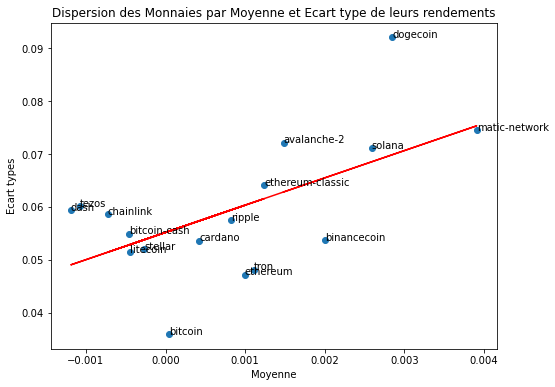

In [69]:
# Tracer un graphe de dispersion des rendements
plt.figure(figsize=(8, 6))
plt.scatter(meanrdt, stdrdt)

# Tracer la droite de régression linéaire
b, m = polyfit(meanrdt, stdrdt, 1)
plt.plot(meanrdt, b + m * meanrdt, color='red')

# Ajouter des étiquettes aux points
for i in range(len(nomsColonnes)):
    plt.text(meanrdt[i], stdrdt[i], nomsColonnes[i])

# Ajouter des étiquettes et un titre
plt.xlabel('Moyenne')
plt.ylabel('Ecart types')
plt.title('Dispersion des Monnaies par Moyenne et Ecart type de leurs rendements')

plt.show()


Nous constatons qu'une partie des rendements rapportent des rendements négatifs avec un minimum de volatilité.

# Construction des portefeuilles

Dans cette partie, nous allons construire les différents portefeuilles : MDP, MinVar, portefeuille à contribution égale au risque et le portefeuille équipondéré. Une fois la construction de ces différents portefeuilles avec les différents rendements jounaliers de chaque cryptomonnaies, nous allons modéliser leurs évolutions à l'aide de différents modèles à un ou plusieurs facteurs.

## Most Doversified Portfolio


Dans un premier temps, nous allons considérer le MDP, le portefeuille qui minimise le diversification ratio, 
\begin{align*}
& \quad DR(w) = \left[\rho(w)(1 - CR(w)) + CR(w)\right]^{-\frac{1}{2}} \\
\end{align*}
avec 
\begin{align*}
&\text{Volatility Weighted Average Correlation} = \frac{\sum_{i \neq j} w_i \cdot w_j \cdot \rho(i, j) \cdot \sigma_i \cdot \sigma_j}{\sum_{i \neq j} w_i \cdot \sigma_i \cdot w_j \cdot \sigma_j}
\end{align*}

\begin{align*}
\text{Min :} & \quad DR(w) \\
\text{Sous contrainte :} & \quad \sum_{i=1}^{N} w_i = 1 \\
& \quad \Sigma w^{MDP} \geq \frac{\sigma(w^{MDP}) \sigma_i}{DR(w^{MDP})} \\
& \text{Où :} & \quad w = [w_1, w_2, \ldots, w_N] \quad \text{(vecteur des pondérations des actifs)} \\
& \quad \Sigma \quad \text{(matrice de covariance des rendements)} \\
& \quad N \quad \text{(nombre d'actifs)}
\end{align*}


In [72]:
from sklearn.covariance import ShrunkCovariance
from sklearn.datasets import make_gaussian_quantiles
real_cov = np.array([[.8, .3],
                     [.3, .4]])
rng = np.random.RandomState(0)
X = rng.multivariate_normal(mean=[0, 0],
                                   cov=real_cov,
                                   size=500)
cov = ShrunkCovariance().fit(real_cov)
cov.covariance_

array([[ 0.0595 , -0.01125],
       [-0.01125,  0.0055 ]])

In [386]:
from scipy.optimize import minimize, LinearConstraint
from sklearn.covariance import ShrunkCovariance
from sklearn.datasets import make_gaussian_quantiles

#from riskfolio.RiskFunctions import Covariances #A installer pour shrinker la matrice de covariance 
def VMAC(w, covariance_matrix):
    N = len(w)
    avg_corr = 0
    volatility_vector = np.diag(covariance_matrix)
    total_volatility = np.sqrt(np.dot(w.T, np.dot(covariance_matrix, w)))

    for i in range(N):
        for j in range(N):
            avg_corr += w[i] * w[j] * covariance_matrix[i, j] * (volatility_vector[i] / total_volatility) * (
                    volatility_vector[j] / total_volatility)

    return avg_corr
def VWAC(weights, correlations, volatilities):
    N = len(weights)
    
    numerator = np.sum(weights[i] * weights[j] * correlations[i, j] * volatilities[i] * volatilities[j] 
                      for i in range(N) for j in range(N) if i != j)
    
    denominator = np.sum(weights[i] * weights[j] * volatilities[i] * volatilities[j] 
                        for i in range(N) for j in range(N) if i != j)
    
    return numerator / denominator
def CR(w, covariance_matrix):
    N = len(w)
    CRatio = 0
    CRatio2=0
    volatility_vector = np.diag(covariance_matrix)
    total_volatility = np.sqrt(np.dot(w.T, np.dot(covariance_matrix, w)))

    for i in range(N):
        CRatio += (w[i] * volatility_vector[i]) ** 2
        CRatio2+=w[i] * volatility_vector[i]
    return  CRatio / (CRatio2 ** 2)

def FirstOrderCond(w,corrmatrix ,covariance_matrix):
    DR = np.sqrt(VWAC(w,corrmatrix,covariance_matrix) * (1 - CR(w, covariance_matrix)) + CR(w, covariance_matrix))
    vol = np.sqrt(np.dot(w.T, np.dot(covariance_matrix, w)))
    lambda_val = np.dot(w.T, np.dot(covariance_matrix, w)) / DR
    volactif=np.sqrt(np.diag(Covariance))

    # Contrainte d'inégalité (ceq)
    ceq = np.dot(w.T, covariance_matrix) - (vol / DR) * volactif #+ lambda_val

    return ceq

# Initialisation des poids
# weight = np.ones(rdtdaily.shape[1]) / rdtdaily.shape[1]

# Paramètre de régularisation (à ajuster)
delta = 0.5
Covariance = np.cov(rdtdaily, rowvar=False) #rebalancement annuel
Corrmatrix=np.corrcoef(rdtdaily, rowvar=False)
# Calcul de la matrice de covariance shrinkée selon DGU, cela attenuera les valeurs ayant trop explosé lors des News
v = np.var(rdtdaily, axis=0)
#bar_v = np.mean(v)
C_shrunk = delta * Covariance + (1 - delta) * np.diag(Covariance) * np.ones((nbColonnes, nbColonnes))
#cov = ShrunkCovariance().fit(Covariance)

#C_shrunk=cov.covariance_
# Créez un objet Covariances
#covar = Covariances()

# Appliquez la méthode cov_shrink_rblw
#C_shrunk = covar.cov_shrink_rblw(Covariance)
C_shrunk= Covariance#shrunk_covariance(Covariance)
# Créez un objet Covariance


# Appliquez la méthode shrinkage avec cov_shrink_rblw()
#C_shrunk =  LedoitWolf().fit(Covariance).covariance_
# Fonction objective (on mets moins pour transformer le problème de minimisation en maximisation) 
#Et on multiplie par les parts pour avoir la moyenne pondérée des DR
def DR(w):
    dr=((VWAC(w,Corrmatrix,C_shrunk) * (1 - CR(w, C_shrunk)) + CR(w, C_shrunk))**-0.5)
    #dr=np.dot(w.T, C_shrunk)/np.sqrt(np.dot(w.T, np.dot(C_shrunk, w)))
    return -np.dot(w.T,dr)

# Contraintes d'égalité
Aeq = np.ones((1, rdtdaily.shape[1]))
beq = 1


# Bornes des variables de décision
lb =np.zeros(rdtdaily.shape[1])
ub = np.ones(rdtdaily.shape[1])

# Initialisation des variables
x0 = np.ones(rdtdaily.shape[1]) / rdtdaily.shape[1]
# Contrainte linéaire (pour la nouvelle contrainte)
def nonlincon(w):
    ceq = np.zeros(2)
    ceq[0] = Aeq.dot(w) - beq
    ceq[1] = FirstOrderCond(w, C_shrunk)[1]
    return ceq
#Contrainte d'inégalité 
def inequality_constraint(w, wMDP, C_shrunk):
    corr_w_wMDR = np.corrcoef(w, wMDP)[0, 1]
    DR_w = np.sqrt(VMAC(w, C_shrunk) * (1 - CR(w, C_shrunk)) + CR(w, C_shrunk))
    DR_wMDP = np.sqrt(VMAC(wMDP, C_shrunk) * (1 - CR(wMDP, C_shrunk)) + CR(wMDP, C_shrunk))
    if np.isfinite(corr_w_wMDR) and np.isfinite(DR_w) and np.isfinite(DR_wMDP) and DR_wMDP != 0:
        return corr_w_wMDR - DR_w / DR_wMDP
    else:
        return 0  # ou une valeur par défaut, selon votre logique

# Résolution du problème d'optimisation
resultMDP = minimize(DR, x0, constraints=({'type': 'eq', 'fun': lambda w: Aeq.dot(w) - beq}),#,{'type': 'ineq', 'fun': lambda w: FirstOrderCond(w,Corrmatrix,C_shrunk)}),
                  bounds=[(l, u) for l, u in zip(lb, ub)], options={'disp': True})

xMDP = resultMDP.x
DRMDP = -DR(xMDP)

# Affichage des résultats
print("Résultats de l'optimisation :")
print("Variables optimales :", xMDP)
portfolioVarMDP = xMDP @ C_shrunk @ xMDP
print("Variance du portefeuille MDP :", np.dot(xMDP.T, np.dot(C_shrunk, xMDP)))


# Récupération du rendement du portefeuille avec la pondération du portefeuille
RptfMDP = np.dot(xMDP, rdtdaily.T)
MktcapvolMDP = np.dot(xMDP, Mktcapvoldata.T)
volumeMDP = np.dot(xMDP, volumebinancedata.T)




C:\Users\jeanb\AppData\Local\Temp/ipykernel_75956/387178518.py:21: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  numerator = np.sum(weights[i] * weights[j] * correlations[i, j] * volatilities[i] * volatilities[j]
C:\Users\jeanb\AppData\Local\Temp/ipykernel_75956/387178518.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  denominator = np.sum(weights[i] * weights[j] * volatilities[i] * volatilities[j]


Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.3275966115502054
            Iterations: 9
            Function evaluations: 163
            Gradient evaluations: 9
Résultats de l'optimisation :
Variables optimales : [5.70420886e-17 4.21092116e-18 0.00000000e+00 1.57426629e-01
 4.15396284e-17 2.09719110e-01 6.68211390e-02 3.37003003e-17
 2.46516248e-17 3.15697037e-17 1.18433855e-17 0.00000000e+00
 2.10481160e-03 1.72921821e-01 1.11425243e-01 1.80818903e-01
 9.87623433e-02]
Variance du portefeuille MDP : 0.0025085609803379904


In [383]:
np.dot(x0.T,DR(x0))

C:\Users\jeanb\AppData\Local\Temp/ipykernel_75956/829070922.py:21: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  numerator = np.sum(weights[i] * weights[j] * correlations[i, j] * volatilities[i] * volatilities[j]
C:\Users\jeanb\AppData\Local\Temp/ipykernel_75956/829070922.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  denominator = np.sum(weights[i] * weights[j] * volatilities[i] * volatilities[j]


array([-0.07364575, -0.07364575, -0.07364575, -0.07364575, -0.07364575,
       -0.07364575, -0.07364575, -0.07364575, -0.07364575, -0.07364575,
       -0.07364575, -0.07364575, -0.07364575, -0.07364575, -0.07364575,
       -0.07364575, -0.07364575])

In [333]:
pd.DataFrame(Covariance)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.001296,0.001406,0.001448,0.001280,0.001458,0.001111,0.001477,0.001522,0.001306,0.001306,0.001448,0.001446,0.001295,0.001461,0.001640,0.001489,0.001560
1,0.001406,0.002227,0.001938,0.001702,0.001962,0.001474,0.002205,0.002199,0.001746,0.001781,0.001983,0.002034,0.001737,0.002168,0.002387,0.001866,0.002166
2,0.001448,0.001938,0.003017,0.001947,0.002298,0.001740,0.002761,0.002365,0.002022,0.001884,0.002475,0.002319,0.001796,0.001929,0.002318,0.002290,0.002232
3,0.001280,0.001702,0.001947,0.003302,0.001970,0.001693,0.002080,0.002161,0.002181,0.001807,0.002034,0.002136,0.001782,0.002069,0.002322,0.001684,0.002324
4,0.001458,0.001962,0.002298,0.001970,0.002652,0.001649,0.002488,0.002374,0.001932,0.001927,0.002459,0.002245,0.001860,0.002039,0.002411,0.002190,0.002248
5,0.001111,0.001474,0.001740,0.001693,0.001649,0.002321,0.001870,0.001801,0.001596,0.001535,0.001866,0.001916,0.001549,0.001603,0.001977,0.001645,0.001735
6,0.001477,0.002205,0.002761,0.002080,0.002488,0.001870,0.004113,0.002593,0.002148,0.002155,0.002903,0.002615,0.001955,0.002292,0.002606,0.002730,0.002478
7,0.001522,0.002199,0.002365,0.002161,0.002374,0.001801,0.002593,0.003442,0.002218,0.002253,0.002511,0.002671,0.002074,0.002431,0.002915,0.002301,0.002641
8,0.001306,0.001746,0.002022,0.002181,0.001932,0.001596,0.002148,0.002218,0.002703,0.002110,0.002037,0.002191,0.001693,0.001737,0.002408,0.001954,0.002234
9,0.001306,0.001781,0.001884,0.001807,0.001927,0.001535,0.002155,0.002253,0.002110,0.002878,0.001990,0.002149,0.001731,0.002097,0.002579,0.001963,0.002638


In [334]:
ShrunkCovariance(Covariance)

C:\Users\jeanb\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass store_precision=[[0.00129599 0.00140604 0.00144839 0.00128015 0.00145795 0.00111124
  0.0014768  0.00152194 0.00130576 0.00130642 0.00144848 0.00144626
  0.00129493 0.00146141 0.00163981 0.00148879 0.00156045]
 [0.00140604 0.00222735 0.00193787 0.00170219 0.00196219 0.00147398
  0.00220517 0.00219927 0.00174629 0.00178107 0.001983   0.00203374
  0.00173669 0.00216763 0.00238713 0.00186571 0.0021664 ]
 [0.00144839 0.00193787 0.0030175  0.00194704 0.00229757 0.00174041
  0.00276141 0.002365   0.00202184 0.00188449 0.0024754  0.00231885
  0.0017956  0.00192928 0.00231779 0.00229016 0.00223236]
 [0.00128015 0.00170219 0.00194704 0.00330194 0.00197004 0.00169258
  0.00208035 0.00216069 0.00218139 0.00180695 0.00203373 0.00213619
  0.00178193 0.00206868 0.00232178 0.00168428 0.00232356]
 [0.00145795 0.00196219 0.00229757 0.00197004 0.0026515  0.00164887
  0.00248834 0.00237439 0.00193202 0.00192688

ShrunkCovariance(store_precision=array([[0.00129599, 0.00140604, 0.00144839, 0.00128015, 0.00145795,
        0.00111124, 0.0014768 , 0.00152194, 0.00130576, 0.00130642,
        0.00144848, 0.00144626, 0.00129493, 0.00146141, 0.00163981,
        0.00148879, 0.00156045],
       [0.00140604, 0.00222735, 0.00193787, 0.00170219, 0.00196219,
        0.00147398, 0.00220517, 0.00219927, 0.00174629, 0.00178107,
        0.001983  , 0....
       [0.00148879, 0.00186571, 0.00229016, 0.00168428, 0.00219038,
        0.00164483, 0.00272985, 0.0023011 , 0.00195382, 0.00196322,
        0.00216261, 0.00214436, 0.00153215, 0.00205692, 0.00210049,
        0.00847575, 0.00233788],
       [0.00156045, 0.0021664 , 0.00223236, 0.00232356, 0.00224845,
        0.00173491, 0.00247822, 0.00264122, 0.00223445, 0.00263754,
        0.00247679, 0.00269723, 0.00233974, 0.00300613, 0.00328601,
        0.00233788, 0.0052057 ]]))

## Equal-risk-contribution portfolio ERC
Un portefeuille à contribution égale au risque (ERC) consiste à déterminer les poids des actifs de manière à ce que chaque actif contribue de manière égale à la volatilité totale du portefeuille. Ici, nous prenons comme cible le portefeuille équipondéré, cette cible peut être modiifié selon les objectifs du gérants 

\begin{align*}
\text{Minimiser :} & \quad \sum_{i=1}^{N} \left(\frac{w_i \sqrt{\Sigma_{ii}}}{\sum_{j=1}^{N} w_j \sqrt{\Sigma_{jj}}} - \frac{1}{N}\right)^2 \\
\text{Sous contrainte :} & \quad \sum_{i=1}^{N} w_i = 1 \\
\text{Où :} & \quad w = [w_1, w_2, \ldots, w_N] \quad \text{(vecteur des pondérations des actifs)} \\
& \quad \Sigma \quad \text{(matrice de covariance des rendements)} \\
& \quad N \quad \text{(nombre d'actifs)}
\end{align*}


In [370]:
# Nombre d'actifs
numAssets = C_shrunk.shape[0]

# Initialisation des poids égaux
weights = np.ones(numAssets) / numAssets

# Fonction objective pour minimiser la contribution au risque
#RiskContribution mesure la contribution au risque de chaque actif en divisant le risque individuel par le risque total du portefeuille, et cherche à minimiser la somme des carrés des différences entre les contributions au risque individuelles et la contribution cible (qui est l'inverse du nombre d'actifs).
def RiskContribution(w, cov_matrix):
    total_risk = np.sum(w * np.sqrt(np.diag(cov_matrix)))
    risk_contributions = (w * np.sqrt(np.diag(cov_matrix))) / total_risk
    target_contrib = 1 / len(w)
    return np.sum((risk_contributions - target_contrib)**2)

# Contraintes
constraints = ({'type': 'eq', 'fun': lambda w: Aeq.dot(w) - beq})

# Initialisation des poids égaux
initial_weights = np.ones(numAssets) / numAssets

# Bornes des variables de décision (pondérations)
bounds = tuple((0, 1) for _ in range(numAssets))

# Résolution du problème d'optimisation
resultERCR = minimize(RiskContribution, initial_weights, args=(C_shrunk,), method='SLSQP', constraints=constraints, bounds=bounds)

# Affichage des résultats
print('Pondérations pour un portefeuille à contribution égale au risque :')
xERC=resultERC.x
print(xERC)

# Calcul de la variance du portefeuille
portfolioVarERC = xERC @ C_shrunk @ xERC
print(f'Variance du portefeuille ERC : {portfolioVarERC}')

# Calcul du diversification Ratio
DRERC = -DR(xERC)

# Récupération du rendement du portefeuille avec la pondération du portefeuille
RptfERC = xERC @ rdtdaily.T
MktcapvolERC = xERC @ Mktcapvoldata.T
volumeERC = xERC @ volumebinancedata.T

Pondérations pour un portefeuille à contribution égale au risque :
[0.114718   0.08097074 0.06316744 0.05893773 0.0732797  0.08453918
 0.04593455 0.05848579 0.07105588 0.06226101 0.05422843 0.05412065
 0.06168835 0.0333747  0.03209979 0.01729304 0.03384503]
Variance du portefeuille ERC : 0.001978728309623648


C:\Users\jeanb\AppData\Local\Temp/ipykernel_75956/251953397.py:21: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  numerator = np.sum(weights[i] * weights[j] * correlations[i, j] * volatilities[i] * volatilities[j]
C:\Users\jeanb\AppData\Local\Temp/ipykernel_75956/251953397.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  denominator = np.sum(weights[i] * weights[j] * volatilities[i] * volatilities[j]


## Minimum-variance portfolio


\begin{align*}
\text{Minimiser :} & \quad w^T \Sigma w \\
\text{Sous contrainte :} & \quad \sum_{i=1}^{N} w_i = 1 \\
\text{Où :} & \quad w = [w_1, w_2, \ldots, w_N] \quad \text{(vecteur des pondérations des actifs)} \\
& \quad \Sigma \quad \text{(matrice de covariance des rendements)} \\
& \quad N \quad \text{(nombre d'actifs)}
\end{align*}


In [371]:
# Fonction Variance à minimiser
def VarianceMin(w, Sigma):
    return w @ Sigma @ w
# Contrainte : somme des pondérations égale à 1
Aeq = np.ones((1, rdtdaily.shape[1]))
beq = 1

constraint = {'type': 'eq', 'fun': lambda w: Aeq.dot(w) - beq}

# Initialisation des pondérations (poids égaux)
w_init = np.ones(numAssets) / numAssets

# Bornes des variables de décision (pondérations)
bounds = [(0, 1) for i in range(numAssets)]

# Résolution du problème d'optimisation
resultMinVar = minimize(VarianceMin, w_init, args=(C_shrunk,), method='SLSQP', constraints=constraint, bounds=bounds)

# Affichage des résultats
print('Résultats de l''optimisation :')
xMinVar=resultMinVar.x
print(f'Parts optimales : {xMinVar}')

# Calcul de la variance du portefeuille MinVar
portfolioVarMinVar = xMinVar.T @ C_shrunk @ xMinVar
print(f'Variance du portefeuille MinVar : {portfolioVarMinVar}')

DRMinVar = -DR(xMinVar)

# Récupération du rendement du portefeuille avec la pondération du portefeuille
RptfMinVar = xMinVar @ rdtdaily.T
MktcapvolMinVar = xMinVar @ Mktcapvoldata.T
volumeMinVar = xMinVar @ volumebinancedata.T

Résultats de loptimisation :
Parts optimales : [7.74013425e-01 4.16333634e-17 0.00000000e+00 8.67361738e-19
 3.46944695e-18 2.25986575e-01 0.00000000e+00 2.60208521e-18
 3.46944695e-18 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.31512465e-17 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
Variance du portefeuille MinVar : 0.0012836840614476078


C:\Users\jeanb\AppData\Local\Temp/ipykernel_75956/251953397.py:21: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  numerator = np.sum(weights[i] * weights[j] * correlations[i, j] * volatilities[i] * volatilities[j]
C:\Users\jeanb\AppData\Local\Temp/ipykernel_75956/251953397.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  denominator = np.sum(weights[i] * weights[j] * volatilities[i] * volatilities[j]


## Equal-weighted portfolio EW
Calcul dur Dispersion Ratio, pour un portefeuille équipondéré, 

In [373]:
# Initialisation des poids égaux
xEW = np.ones(numAssets) / numAssets

# Calcul du Diversification Ratio pour EW
DREW = -DR(xEW)

# Calcul de la variance du portefeuille EW
portfolioVarEW = xEW @ C_shrunk @ xEW
print(f'Variance du portefeuille EW: {portfolioVarEW}')

# Récupération du rendement du portefeuille avec la pondération du portefeuille
RptfEW = xEW @ rdtdaily.T
MktcapvolEW = xEW @ Mktcapvoldata.T
volumeEW = xEW @ volumebinancedata.T


Variance du portefeuille EW: 0.0021656842831292715


C:\Users\jeanb\AppData\Local\Temp/ipykernel_75956/251953397.py:21: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  numerator = np.sum(weights[i] * weights[j] * correlations[i, j] * volatilities[i] * volatilities[j]
C:\Users\jeanb\AppData\Local\Temp/ipykernel_75956/251953397.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  denominator = np.sum(weights[i] * weights[j] * volatilities[i] * volatilities[j]


In [374]:
# Création d'un DataFrame avec les parts de chaque portefeuille
dataX = {
    'MDP': xMDP,
    'ERC': xERC,
    'MinVar': xMinVar,
    'EW': xEW
}
dataDRVAR = {
    'MDP': {'DR': DRMDP, 'Variance': portfolioVarMDP},
    'ERC': {'DR': DRERC, 'Variance': portfolioVarERC},
    'MinVar': {'DR': DRMinVar, 'Variance': portfolioVarMinVar},
    'EW': {'DR': DREW, 'Variance': portfolioVarEW}
}
df_parts = pd.DataFrame(dataX,index=nomsColonnes)
df_DRVAR= pd.DataFrame(dataDRVAR, index=['Diversification Ratio','Variance ptf'])
# Affichage du DataFrame
print("Parts de chaque portefeuille :")
df_parts


Parts de chaque portefeuille :


,MDP,ERC,MinVar,EW
bitcoin,5.704209e-17,0.114718,7.740134e-01,0.058824
ethereum,4.210921e-18,0.080971,4.163336e-17,0.058824
bitcoin-cash,0.000000e+00,0.063167,0.000000e+00,0.058824
ripple,1.574266e-01,0.058938,8.673617e-19,0.058824
litecoin,4.153963e-17,0.073280,3.469447e-18,0.058824
tron,2.097191e-01,0.084539,2.259866e-01,0.058824
ethereum-classic,6.682114e-02,0.045935,0.000000e+00,0.058824
chainlink,3.370030e-17,0.058486,2.602085e-18,0.058824
stellar,2.465162e-17,0.071056,3.469447e-18,0.058824
cardano,3.156970e-17,0.062261,0.000000e+00,0.058824


Concernant les parts, nous constatons qu'ils sont répartis de façon très inégalitaires dans les portefeuilles Minvar(majoritairement Bitcoin et Tron) et MDP(majoritairement Bitcoin et dogecoin)

In [387]:
print("Diversification Ratios (DR) et la variance de chaque portefeuille :")
df_DRVAR
print("DRMDP:", DRMDP)
print("DRERC:", DRERC)
print("DRMinVar:", DRMinVar)
print("DREW:", DREW)
print("portfolioVarMDP:", portfolioVarMDP)
print("portfolioVarERC:", portfolioVarERC)
print("portfolioVarMinVar:", portfolioVarMinVar)
print("portfolioVarEW:", portfolioVarEW)

Diversification Ratios (DR) et la variance de chaque portefeuille :
DRMDP: 1.3275966115502054
DRERC: 1.2190665774594391
DRMinVar: 1.0923764566413012
DREW: 1.2519777257241074
portfolioVarMDP: 0.0025085609803379904
portfolioVarERC: 0.001978728309623648
portfolioVarMinVar: 0.0012836840614476078
portfolioVarEW: 0.0021656842831292715


Le DR le plus grand est celui du portefeuille MDP et le plus petit celui du portefeuille MinVar.

## Estimation des modèles de regression (CAPM,...)
Récupération du taux sans risque sur la période de la base donnée afin de modéliser la prime de risque,

In [376]:
import yfinance as yf
# Charger les données à partir de Yahoo Finance pour ^IRX entre les dates spécifiées
ticker = "^IRX"
start_date = "2021-01-01"
end_date = "2023-06-29"
#13 week bill treasury 
irx_data = yf.download(ticker, start=start_date, end=end_date)

# Sélectionner la colonne "Adj Close"
adj_close = irx_data['Adj Close']

# Supprimer les lignes contenant NaN dans la colonne "Adj Close"
adj_closeRf = adj_close.dropna()

# Calculer la moyenne du taux sans risque (rendement annualisé)
Rf = adj_closeRf.mean()

# Afficher la moyenne du taux sans risque
print(f"Moyenne du taux sans risque : {Rf:.4}")

[*********************100%***********************]  1 of 1 completed
Moyenne du taux sans risque : 1.752


Etude des ratios de Sharpe 

In [388]:

# Calcul des ratios de Sharpe
SharpeMDP = (np.mean(RptfMDP)*252 - Rf) / (np.sqrt(np.dot(xMDP.T, np.dot(C_shrunk, xMDP)))*(252**0.5))
SharpeERC = (np.mean(RptfERC)*252 - Rf) / (np.sqrt(np.dot(xERC.T, np.dot(C_shrunk, xERC)))*(252**0.5))
SharpeEW = (np.mean(RptfEW)*252 - Rf) / (np.sqrt(np.dot(xEW.T, np.dot(C_shrunk, xEW)))*(252**0.5))
SharpeMinVAR = (np.mean(RptfMinVar)*252 - Rf) / (np.sqrt(np.dot(xMinVar.T, np.dot(C_shrunk, xMinVar)))*(252**0.5))

# Affichage des résultats
print(f"Sharpe ratio for MDP: {SharpeMDP:.4f}")
print(f"Sharpe ratio for ERC: {SharpeERC:.4f}")
print(f"Sharpe ratio for EW: {SharpeEW:.4f}")
print(f"Sharpe ratio for MinVar: {SharpeMinVAR:.4f}")


Sharpe ratio for MDP: -1.5710
Sharpe ratio for ERC: -2.3024
Sharpe ratio for EW: -2.1044
Sharpe ratio for MinVar: -2.9549


Le meilleur Sharpe Ratio est celui du portefeuille MDP, et tous les ratios de Sharpe sont négatifs.

Concernant l'estimation des différents modèles afin d'expliquer les rendements de chaque portefeuille, nous allons établir quatres modèles: l'impact du facteur volume de chaque actif pondéré avec les parts du portefeuille, l'impact du facteur capitalisation de chaque actif pondéré avec les parts du portefeuille et deux modèles d'estimation CAPM en prenant en compte comme taux de marché les deux plus grosses capitalisation (Bitcoin et Ethereum). Afin d'éviter des problèmes d'échelles, nous avons mis les facteurs volumes et capitalisaton en log.


\begin{align*}
&\text{CAPM Bitcoin: } R_{ptf} = R_f + \beta_{ptf} \cdot (R_{BITCOIN} - R_f)
&\text{CAPM Ethereum: } R_{ptf} = R_f + \beta_{ptf} \cdot (R_{Ethereum} - R_f)
\end{align*}

In [502]:
import statsmodels.api as sm

T = len(rdtdaily)
#On met en logarithme la capitalisation des cryptomonnaies
CMKT = pd.DataFrame(index=range(T + 1), columns=range(2))  # On va supposer deux facteurs marchés Bitcoin et Ethereum
Rptf = pd.DataFrame({'MDP': RptfMDP, 'ERC': RptfERC, 'EW': RptfEW, 'MinVar': RptfMinVar})
Mktcapvolptf = pd.DataFrame({'MDP': np.log(MktcapvolMDP), 'ERC': np.log(MktcapvolERC), 'EW': np.log(MktcapvolEW), 'MinVar': np.log(MktcapvolMinVar)})
Volumeptf = pd.DataFrame({'MDP': np.log(volumeMDP), 'ERC': np.log(volumeERC), 'EW': np.log(volumeEW), 'MinVar': np.log(volumeMinVar)})
betaVolume = pd.DataFrame(index=range(2), columns=['MDP', 'ERC', 'EW', 'MinVar'])
betaVol = pd.DataFrame(index=range(2), columns=['MDP', 'ERC', 'EW', 'MinVar'])
betaMKTBitcoin = pd.DataFrame(index=range(2), columns=['MDP', 'ERC', 'EW', 'MinVar'])
betaMKTETH = pd.DataFrame(index=range(2), columns=['MDP', 'ERC', 'EW', 'MinVar'])
statsVolume = pd.DataFrame(index=range(2), columns=['MDP', 'ERC', 'EW', 'MinVar'])
statsVol = pd.DataFrame(index=range(2), columns=['MDP', 'ERC', 'EW', 'MinVar'])
statsMKTBitcoin = pd.DataFrame(index=range(2), columns=['MDP', 'ERC', 'EW', 'MinVar'])
statsMKTETH = pd.DataFrame(index=range(2), columns=['MDP', 'ERC', 'EW', 'MinVar'])
pvaluevolume = pd.DataFrame(index=range(2), columns=['MDP', 'ERC', 'EW', 'MinVar'])
pvaluevol = pd.DataFrame(index=range(2), columns=['MDP', 'ERC', 'EW', 'MinVar'])
pvalueMKTBitcoin = pd.DataFrame(index=range(2), columns=['MDP', 'ERC', 'EW', 'MinVar'])
pvalueMKTETH = pd.DataFrame(index=range(2), columns=['MDP', 'ERC', 'EW', 'MinVar'])

nomstrategies = ['MDP', 'ERC', 'EW', 'MinVar']
Facteur = ['Volume', 'Volatilité', 'Bitcoin', 'ETH']
new_row = pd.DataFrame([[0,0,0,0]], columns=Rptf.columns)
# Ajoutez la nouvelle ligne à votre DataFrame
Rptf = pd.concat([new_row,Rptf], ignore_index=True)
# Boucle sur les 4 portefeuilles
for i in range(4):
    # on réadapte la matrice rdt pour qu'elle soit de même taille que le Volume
    X = sm.add_constant(Volumeptf.iloc[:, i]).reset_index(drop=True)
    #on met 0 pour les premiers rdt pour avoir le même nombre de lignes entre X et Y

    Y = Rptf.iloc[:, i].reset_index(drop=True)
    model_volume = sm.OLS(Y, X).fit()
    betaVolume.iloc[0, i] = model_volume.params.loc['const']
    betaVolume.iloc[1, i] = model_volume.params.loc[nomstrategies[i]]
    statsVolume.iloc[0, i] = model_volume.tvalues.loc['const']
    statsVolume.iloc[1, i] = model_volume.tvalues.loc[nomstrategies[i]]
    pvaluevolume.iloc[0, i] = model_volume.pvalues.loc['const']
    pvaluevolume.iloc[1, i] = model_volume.pvalues.loc[nomstrategies[i]]
    # Capitalisation
    X = sm.add_constant(Mktcapvolptf.iloc[:, i]).reset_index(drop=True)
    model_vol = sm.OLS(Y, X).fit()

    betaVol.iloc[0, i] = model_vol.params.loc['const']
    betaVol.iloc[1, i] = model_vol.params.loc[nomstrategies[i]]
    statsVol.iloc[0, i] = model_vol.tvalues.loc['const']
    statsVol.iloc[1, i] = model_vol.tvalues.loc[nomstrategies[i]]
    pvaluevol.iloc[0, i] = model_vol.pvalues.loc['const']
    pvaluevol.iloc[1, i] = model_vol.pvalues.loc[nomstrategies[i]]
    #On annualise les rendements du portefeuille
    Y = Rptf.iloc[:, i].reset_index(drop=True)*252
    # Modélisation du CAPM en prenant comme rendement de marché le bitcoin
    CMKT.iloc[:, 0] = [0] + (pd.DataFrame(rdtdaily).iloc[:, 0]*252 - Rf).tolist()  # Crypto currency excess Market with Market return Bitcoin
    X = sm.add_constant(CMKT.iloc[:, 0]).reset_index(drop=True)
    model_MKTBitcoin = sm.OLS(Y, X).fit()
    betaMKTBitcoin.iloc[0, i] = model_MKTBitcoin.params.loc['const']
    betaMKTBitcoin.iloc[1, i] = model_MKTBitcoin.params.loc[0]
    statsMKTBitcoin.iloc[0, i] = model_MKTBitcoin.tvalues.loc['const']
    statsMKTBitcoin.iloc[1, i] = model_MKTBitcoin.tvalues.loc[0]
    pvalueMKTBitcoin.iloc[0, i] = model_MKTBitcoin.pvalues.loc['const']
    pvalueMKTBitcoin.iloc[1, i] = model_MKTBitcoin.pvalues.loc[0]
    # Modélisation du CAPM en prenant comme rendement de marché l'Ethereum
    CMKT.iloc[:, 1] = [0] + (pd.DataFrame(rdtdaily).iloc[:, 1]*252 - Rf).tolist()  # Crypto currency excess Market with Market return Bitcoin
    X = sm.add_constant(CMKT.iloc[:, 1]).reset_index(drop=True)
    model_MKTETH = sm.OLS(Y, X).fit()
    betaMKTETH.iloc[0, i] = model_MKTETH.params.loc['const']
    betaMKTETH.iloc[1, i] = model_MKTETH.params.loc[1]
    statsMKTETH.iloc[0, i] = model_MKTETH.tvalues.loc['const']
    statsMKTETH.iloc[1, i] = model_MKTETH.tvalues.loc[1]
    pvalueMKTETH.iloc[0, i] = model_MKTETH.pvalues.loc['const']
    pvalueMKTETH.iloc[1, i] = model_MKTETH.pvalues.loc[1]

BETA=pd.concat([betaVolume, betaVol, betaMKTBitcoin, betaMKTETH],  keys=['Volume', 'Capitalisation', 'CAPMBitcoin', 'CAPMETH'])
BETA.rename(index={0: 'const', 1: 'beta'}, level=1, inplace=True)
BETA



MDP       ERC        EW    MinVar
Volume         const -0.085367  0.006748 -0.020259  0.033228
               beta   0.004172 -0.000278  0.000954  -0.00138
Capitalisation const  0.075467  -0.17489  -0.16632 -0.138893
               beta  -0.003157  0.006918   0.00672  0.005173
CAPMBitcoin    const  2.374223  1.975315  2.088021  1.754614
               beta   1.076132  1.063148  1.087054  0.967743
CAPMETH        const  1.794017  1.388594  1.502189  1.027341
               beta   0.862094  0.842675  0.871019  0.638142

In [503]:
Pvalue = pd.concat([pvaluevolume, pvaluevol, pvalueMKTBitcoin, pvalueMKTETH], keys=['Volume', 'Capitalisation', 'CAPMBitcoin', 'CAPMETH'])
#Pvalue.index.names = ['Factor', 'Strategy']
Pvalue.rename(index={0: 'const', 1: 'beta'}, level=1, inplace=True)
Pvalue
def style_significant(Pvalue):
    color = 'background-color: lightgreen' if Pvalue < 0.05 else ''
    return color

# Appliquer le style au DataFrame
Pvalue = Pvalue.style.applymap(style_significant)
Pvalue


Parmi les facteurs exposés, il est observé que, parmi les facteurs de taille, seul le facteur du volume a un impact significatif et positif sur le portefeuille MDP au seuil de 5%. De plus, les facteurs liés aux rendements des deux marchés influent de manière significative et positive sur les rendements de l'ensemble des portefeuilles.

## Modèle à deux facteurs CAPM

\begin{align*}
&\text{Modèle explicatif sur les deux rendements de marché: } R_{ptf} = const + \beta_{1,ptf} \cdot (R_{BITCOIN}-R_f)+\beta_{2,ptf} \cdot (R_{ETHEREUM}-R_f)
\end{align*}

In [543]:
def run_two_factor_regression(Rptf, exog, factors):
    # Initialisation des DataFrames
    betaTwoFactors = pd.DataFrame(index=['const'] + factors, columns=Rptf.columns)
    statsTwoFactors = pd.DataFrame(index=['t-stat const'] + ['t-stat {}'.format(f) for f in factors], columns=Rptf.columns)
    pvalueTwoFactors = pd.DataFrame(index=['p-value const'] + ['p-value {}'.format(f) for f in factors], columns=Rptf.columns)
    r2TwoFactors = pd.DataFrame(index=['R2'], columns=Rptf.columns)

    nomstrategies = Rptf.columns

    for i in range(4):
        Y = Rptf.iloc[1:, i].reset_index(drop=True)

        # Régression à deux facteurs
        X = sm.add_constant(exog).reset_index(drop=True)
        model_two_factors = sm.OLS(Y, X, missing='drop').fit()

        # Remplissage des résultats dans les DataFrames
        betaTwoFactors.iloc[0, i] = model_two_factors.params['const']
        betaTwoFactors.iloc[1, i] = model_two_factors.params[1]
        betaTwoFactors.iloc[2, i] = model_two_factors.params[2]
        statsTwoFactors.iloc[0, i] = model_two_factors.tvalues['const']
        statsTwoFactors.iloc[1, i] = model_two_factors.tvalues[1]
        statsTwoFactors.iloc[2, i] = model_two_factors.tvalues[2]
        pvalueTwoFactors.iloc[0, i] = model_two_factors.pvalues['const']
        pvalueTwoFactors.iloc[1, i] = model_two_factors.pvalues[1]
        pvalueTwoFactors.iloc[2, i] = model_two_factors.pvalues[2]
        r2TwoFactors.iloc[0, i] = model_two_factors.rsquared
    # Renommer les indices pour plus de clarté
    betaTwoFactors.index.name = 'Factors'
    statsTwoFactors.index.name = 'Factors'
    pvalueTwoFactors.index.name = 'Factors'
    r2TwoFactors.index.name = 'Factors'
    return betaTwoFactors, statsTwoFactors, pvalueTwoFactors,r2TwoFactors

# Les facteurs Bitcoin et Ethereum
factors_to_include = ['Bitcoin', 'Ethereum']
MKTmodel = dfrdt.iloc[:, :2]*252-Rf 
#On annualise Les rendements du portefeuilles
beta, stats, pvalues,R2 = run_two_factor_regression(Rptf*252, MKTmodel, factors_to_include)

# Afficher les résultats
print("Beta Parameters:")
print(beta)

print("\nStats Two Factors:")
print(stats)

print("\nP-Values Two Factors:")
print(pvalues)

print("\nR2 Two Factors:")
print(R2)

Beta Parameters:
               MDP       ERC        EW    MinVar
Factors                                         
const     2.151197  1.765695  1.862161  1.722982
Bitcoin   0.446998  0.472639  0.450922   0.87404
Ethereum  0.579942  0.544332  0.586387  0.086407

Stats Two Factors:
                       MDP        ERC         EW     MinVar
Factors                                                    
t-stat const      9.074757  11.831095  11.009943  25.115374
t-stat Bitcoin    9.789284  16.441045  13.840755  66.142448
t-stat Ethereum  16.650351   24.82318  23.595872   8.572184

P-Values Two Factors:
                  MDP  ERC   EW MinVar
Factors                               
p-value const     0.0  0.0  0.0    0.0
p-value Bitcoin   0.0  0.0  0.0    0.0
p-value Ethereum  0.0  0.0  0.0    0.0

R2 Two Factors:
              MDP      ERC        EW    MinVar
Factors                                       
R2       0.692453  0.84546  0.818651  0.949665


Le premier modèle à deux facteurs révèle que les facteurs de marché, représentés par les cryptomonnaies à la plus forte capitalisation et au volume élevé, notamment Ethereum et Bitcoin, ont un impact significatif sur les rendements de l'ensemble des portefeuilles. Même si ces deux cryptomonnaies sont pondérées faiblement dans certains portefeuilles, leur forte capitalisation semble exercer une influence sur le cours des autres cryptomonnaies. Ainsi, même avec une pondération modeste, les variations de l'Ethereum et du Bitcoin peuvent affecter les cours des autres cryptomonnaies qui ont des pondérations plus importantes dans les portefeuilles.

In [517]:
Mktcapvolptf

,MDP,ERC,EW,MinVar
0,21.503930,24.996971,24.401182,26.758666
1,21.572856,25.006821,24.410910,26.770004
2,21.576720,25.092475,24.493905,26.861456
3,21.618599,25.143327,24.553659,26.887490
4,21.628451,25.108068,24.522497,26.841047
...,...,...,...,...
905,22.983384,25.258509,24.740227,26.855341
906,22.992330,25.259399,24.742259,26.852817
907,22.969178,25.248624,24.730086,26.845643
908,22.983370,25.263517,24.745221,26.859655



\begin{align*}
&\text{Modèle explicatif avec le Facteur taille: } R_{ptf} = const + \beta_{1,ptf} \cdot (Capitalisation_{ptf})+\beta_{2,ptf} \cdot (Volume_{ptf})
\end{align*}

In [542]:
def run_two_factor_regressionSize(Rptf, exog1,exog2, factors):
    # Initialisation des DataFrames
    betaTwoFactorsSize = pd.DataFrame(index=['const'] + factors, columns=Rptf.columns)
    statsTwoFactorsSize = pd.DataFrame(index=['t-stat const'] + ['t-stat {}'.format(f) for f in factors], columns=Rptf.columns)
    pvalueTwoFactorsSize = pd.DataFrame(index=['p-value const'] + ['p-value {}'.format(f) for f in factors], columns=Rptf.columns)
    r2TwoFactorsSize = pd.DataFrame(index=['R2'], columns=Rptf.columns)

    nomstrategies = Rptf.columns
    
    for i in range(4):
        Y = Rptf.iloc[:, i].reset_index(drop=True)
        
        # Régression à deux facteurs
        exog=pd.concat([exog1.iloc[:,i],exog2.iloc[:,i]],axis=1)
        X = sm.add_constant(exog).reset_index(drop=True)
        model_two_factors = sm.OLS(Y, X, missing='drop').fit()

        # Remplissage des résultats dans les DataFrames
        betaTwoFactorsSize.iloc[0, i] = model_two_factors.params[0]
        betaTwoFactorsSize.iloc[1, i] = model_two_factors.params[1]
        betaTwoFactorsSize.iloc[2, i] = model_two_factors.params[2]
        statsTwoFactorsSize.iloc[0, i] = model_two_factors.tvalues[0]
        statsTwoFactorsSize.iloc[1, i] = model_two_factors.tvalues[1]
        statsTwoFactorsSize.iloc[2, i] = model_two_factors.tvalues[2]
        pvalueTwoFactorsSize.iloc[0, i] = model_two_factors.pvalues[0]
        pvalueTwoFactorsSize.iloc[1, i] = model_two_factors.pvalues[1]
        pvalueTwoFactorsSize.iloc[2, i] = model_two_factors.pvalues[2]
        r2TwoFactorsSize.iloc[0, i] = model_two_factors.rsquared
    # Renommer les indices pour plus de clarté
    betaTwoFactorsSize.index.name = 'Factors'
    statsTwoFactorsSize.index.name = 'Factors'
    pvalueTwoFactorsSize.index.name = 'Factors'
    r2TwoFactorsSize.index.name='Factors'
    return betaTwoFactorsSize, statsTwoFactorsSize, pvalueTwoFactorsSize,r2TwoFactorsSize

#Avec le facteurs volumes et capitalisation
#SizeFactor=pd.concat(Mktcapvolptf,Volumeptf)
SizeFactor = ['LogCapitalisation', 'LogVolume']
beta, stats, pvalues,R2 = run_two_factor_regressionSize(Rptf, Mktcapvolptf,Volumeptf, SizeFactor)
# Afficher les résultats
print("Beta Parameters:")
print(beta)

print("\nStats Two Factors:")
print(stats)

print("\nP-Values Two Factors:")
print(pvalues)
print("\nR2 Two Factors:")
print(R2)

Beta Parameters:
                        MDP       ERC        EW    MinVar
Factors                                                  
const              0.043656 -0.162882 -0.163748 -0.106953
LogCapitalisation -0.007701  0.009051  0.007871  0.006721
LogVolume           0.00657 -0.002941 -0.001415 -0.003083

Stats Two Factors:
                               MDP       ERC        EW    MinVar
Factors                                                         
t-stat const              0.602174 -1.616923 -1.599012 -1.232421
t-stat LogCapitalisation -2.217689  2.034056  1.663227  2.028579
t-stat LogVolume          2.819535 -1.037836 -0.491582 -1.310095

P-Values Two Factors:
                                MDP       ERC        EW    MinVar
Factors                                                          
p-value const              0.547209  0.106243  0.110166  0.218111
p-value LogCapitalisation  0.026823  0.042236  0.096613  0.042793
p-value LogVolume          0.004914  0.299623  0.623134  0.19

Nous observons que le facteur de taille a un impact significatif sur le portefeuille MDP, avec tous ses coefficients présentant des différences significatives par rapport à zéro. Pour les portefeuilles ERC et EW, le facteur de logCapitalisation a un impact sur le modèle, tandis que le facteur logVolume n'est pas significatif. En ce qui concerne le portefeuille équipondéré, les rendements du portefeuille semblent être insensibles aux facteurs de taille. De plus, les valeurs de R2 pour tous les modèles restent relativement faibles, indiquant que le facteur de taille ne capture qu'une petite partie de la variation des rendements de chaque portefeuille.

Nous allons à présent étudier les facteurs de volatilités de chaque cryptomonnaies afin de voir leurs impacts pour chacun des portefeuilles

Définition de la fonction pour calculer les facteurs :
\begin{align*}
&\text{Modèle explicatif avec le Facteur taille: } R_{ptf} = const + \beta_{1,ptf} (Cryptocurrencyyield) +\epsilon_t
\end{align*}

In [615]:

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Exemple de matrices de rendement (à remplacer par vos données réelles)
portfolio_returns = Rptf

crypto_market_returns = dfrdt
# Liste des crypto-monnaies
crypto_markets = crypto_market_returns.columns.tolist()

# Liste des portefeuilles
portfolios = portfolio_returns.columns.tolist()
#Taille de la fenetres
window_size=50
# Facteurs BETA, IDIOVOL, RETVOL, MAXRET, ...
def calculate_factors(data):
    X = data['Crypto_Market_Return'].values.reshape(-1, 1)
    y = data['Portfolio_Return'].values
    X = sm.add_constant(X)  # Ajoutez une constante à la matrice X pour le modèle statsmodels
    model = sm.OLS(y, X).fit()
    residuals = y - model.predict(X)
    beta = model.params[1]
            
    idiovol = np.std(residuals)#la volatilité idiosyncrasique mesurée comme l'écart-type des es résidus de la régression des rendements des pièces sur le rendement du marché des crypto-monnaies en utilisant une fenêtre glissante de 60 jours.comme l'écart-type des résidus de la régression des rendements des pièces sur le rendement du marché des crypto-monnaies en utilisant une fenêtre glissante de 60 jours.
    #idiovol=residuals.rolling(window=window_size).std()
    retvol = np.std(data['Portfolio_Return'].rolling(window=window_size).std())# l'écart type des rendements du portefeuille au cours des X jours précédents
    maxret = np.max(data['Portfolio_Return'].rolling(window=window_size).max())# le rendement maximal du portefeuille au cours des X jours précédents
    p_value = model.pvalues[1]
    r_squared = model.rsquared
    return {'BETA': beta, 'IDIOVOL': idiovol, 'RETVOL': retvol, 'MAXRET': maxret, 'P_Value': p_value, 'R_Squared': r_squared}

# Résultats
results = []

# Boucle sur les portefeuilles
for portfolio in portfolios:
    # Boucle sur les crypto-monnaies
    for crypto_market in crypto_markets:
        crypto_col = crypto_market
        portfolio_col = portfolio
        
        # Sélectionnez les colonnes pertinentes
        selected_data = pd.DataFrame({
            'Crypto_Market_Return': crypto_market_returns[crypto_col],
            'Portfolio_Return': portfolio_returns[portfolio_col]
        })
        selected_data = selected_data.dropna()  # Supprimez les lignes avec des valeurs manquantes
        
        # Application de la fonction pour calculer les facteurs
        factors = calculate_factors(selected_data)
        
        # Ajout d'autres informations à factors si nécessaire
        factors.update({'Portfolio': portfolio, 'Crypto_Market': crypto_market})
        
        # Ajout des résultats à la liste
        results.append(factors)

# Créez un DataFrame à partir des résultats
results_FacteurRdt = pd.DataFrame(results)

# Affichez les résultats
results_FacteurRdt.head() 

,BETA,IDIOVOL,RETVOL,MAXRET,P_Value,R_Squared,Portfolio,Crypto_Market
0,-0.084445,0.049944,0.017597,0.293166,0.067257,0.003687,MDP,bitcoin
1,-0.068262,0.049932,0.017597,0.293166,0.052442,0.004141,MDP,ethereum
2,-0.034685,0.050000,0.017597,0.293166,0.251690,0.001448,MDP,bitcoin-cash
3,-0.037612,0.049989,0.017597,0.293166,0.193461,0.001864,MDP,ripple
4,-0.047356,0.049976,0.017597,0.293166,0.142271,0.002372,MDP,litecoin


In [623]:
results_FacteurRdt.sort_values(by='R_Squared', ascending=False).head()

,BETA,IDIOVOL,RETVOL,MAXRET,P_Value,R_Squared,Portfolio,Crypto_Market
60,-0.061744,0.035651,0.010532,0.165169,0.005275,0.008549,MinVar,cardano
26,-0.075961,0.044250,0.015127,0.217864,0.005688,0.008400,ERC,cardano
43,-0.072275,0.046324,0.015783,0.229814,0.011931,0.006949,EW,cardano
32,-0.040117,0.044283,0.015127,0.217864,0.012232,0.006900,ERC,dogecoin
49,-0.040254,0.046338,0.015783,0.229814,0.016271,0.006349,EW,dogecoin


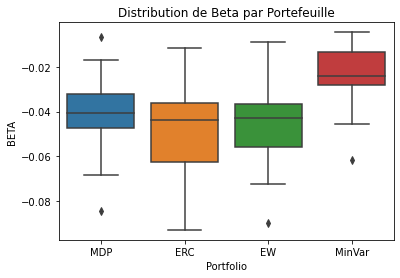

In [613]:
results_FacteurRdt = pd.DataFrame(results)

# Analyse comparative
# Exemple : Comparaison des BETA entre les portefeuilles
sns.boxplot(x='Portfolio', y='BETA', data=results_FacteurRdt )
plt.title('Distribution de Beta par Portefeuille')
plt.show()


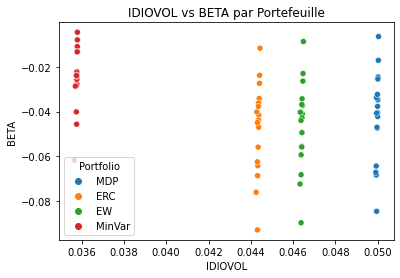

In [614]:
# Scatter plot de IDIOVOL vs BETA
sns.scatterplot(x='IDIOVOL', y='BETA', hue='Portfolio', data=results_df)
plt.title('IDIOVOL vs BETA par Portefeuille')
plt.show()

Nous trions les moyennes des capitalisations de chaque cryptomonnaies dans l'ordre décroissant afin de séparer les groupes LargeCap, MidCap et SmallCap pour les comparer entre eux.
Nous considérons les capitalisations: 
smallCap>1e+11, 
1e+10<midCap<1e+11 et 
LargeCap<1e+10

In [574]:
pd.DataFrame(meanCap,columns=['Valeurs'],index=nomsColonnes).sort_values(by='Valeurs', ascending=False)

,Valeurs
bitcoin,6.702171e+11
ethereum,2.673846e+11
binancecoin,5.491974e+10
ripple,3.066394e+10
cardano,3.027177e+10
solana,1.876406e+10
dogecoin,1.812737e+10
avalanche-2,8.596422e+09
litecoin,8.551655e+09
matic-network,7.790855e+09


Résultats pour les plus grosses Capitalisations

In [576]:
# Filtrer les résultats pour les catégories Bitcoin et Ethereum
filtered_resultsLargeCAP = results_df[(results_df['Crypto_Market'] == 'bitcoin') | (results_df['Crypto_Market'] == 'ethereum')]

# Afficher les résultats filtrés
filtered_resultsLargeCAP

,BETA,IDIOVOL,RETVOL,MAXRET,P_Value,R_Squared,Portfolio,Crypto_Market
0,-0.084445,0.049944,0.016802,0.293166,0.067257,0.003687,MDP,bitcoin
1,-0.068262,0.049932,0.016802,0.293166,0.052442,0.004141,MDP,ethereum
17,-0.092769,0.044311,0.014446,0.217864,0.023528,0.005642,ERC,bitcoin
18,-0.068585,0.044319,0.014446,0.217864,0.028177,0.005300,ERC,ethereum
34,-0.089583,0.046374,0.015061,0.229814,0.036606,0.004808,EW,bitcoin
35,-0.068143,0.046374,0.015061,0.229814,0.037132,0.004781,EW,ethereum
51,-0.045597,0.035766,0.009884,0.165169,0.167489,0.002100,MinVar,bitcoin
52,-0.027443,0.035781,0.009884,0.165169,0.276214,0.001307,MinVar,ethereum


MidCap

In [579]:
# Filtrer les résultats pour les catégories Bitcoin et Ethereum
filtered_resultsMidCAP = results_df[(results_df['Crypto_Market'] == 'binancecoin') | (results_df['Crypto_Market'] == 'ripple')| (results_df['Crypto_Market'] == 'cardano')| (results_df['Crypto_Market'] == 'solana')| (results_df['Crypto_Market'] == 'dogecoin')]

# Afficher les résultats filtrés
filtered_resultsMidCAP

,BETA,IDIOVOL,RETVOL,MAXRET,P_Value,R_Squared,Portfolio,Crypto_Market
3,-0.037612,0.049989,0.016802,0.293166,0.193461,0.001864,MDP,ripple
9,-0.067086,0.049906,0.016802,0.293166,0.030226,0.005167,MDP,cardano
12,-0.040396,0.049989,0.016802,0.293166,0.191409,0.001881,MDP,binancecoin
13,-0.025445,0.050003,0.016802,0.293166,0.276164,0.001307,MDP,solana
15,-0.033721,0.049940,0.016802,0.293166,0.061644,0.003845,MDP,dogecoin
20,-0.034162,0.044394,0.014446,0.217864,0.183535,0.001949,ERC,ripple
26,-0.075961,0.044250,0.014446,0.217864,0.005688,0.008400,ERC,cardano
29,-0.062389,0.044310,0.014446,0.217864,0.022962,0.005689,ERC,binancecoin
30,-0.036173,0.044362,0.014446,0.217864,0.081146,0.003350,ERC,solana
32,-0.040117,0.044283,0.014446,0.217864,0.012232,0.006900,ERC,dogecoin


SmallCap

In [584]:
# Liste des noms de cryptomonnaies sans les chiffres
SmallCap_names = [
    'avalanche',
    'litecoin',
    'matic-network',
    'chainlink',
    'bitcoin-cash',
    'tron',
    'stellar',
    'ethereum-classic',
    'tezos',
    'dash'
]

# Filtrer les résultats pour les noms de cryptomonnaies sans les chiffres
filtered_resultsSmallCAP = results_df[results_df['Crypto_Market'].str.replace(r'\d+', '').isin(SmallCap_names)]
filtered_resultsSmallCAP

C:\Users\jeanb\AppData\Local\Temp/ipykernel_75956/3403025030.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_resultsSmallCAP = results_df[results_df['Crypto_Market'].str.replace(r'\d+', '').isin(SmallCap_names)]


,BETA,IDIOVOL,RETVOL,MAXRET,P_Value,R_Squared,Portfolio,Crypto_Market
2,-0.034685,0.050000,0.016802,0.293166,0.251690,0.001448,MDP,bitcoin-cash
4,-0.047356,0.049976,0.016802,0.293166,0.142271,0.002372,MDP,litecoin
5,-0.042173,0.049995,0.016802,0.293166,0.221591,0.001647,MDP,tron
6,-0.006488,0.050034,0.016802,0.293166,0.802407,0.000069,MDP,ethereum-classic
7,-0.046956,0.049960,0.016802,0.293166,0.097324,0.003028,MDP,chainlink
8,-0.064265,0.049924,0.016802,0.293166,0.044261,0.004454,MDP,stellar
10,-0.024525,0.050015,0.016802,0.293166,0.380503,0.000848,MDP,dash
11,-0.017100,0.050025,0.016802,0.293166,0.535761,0.000423,MDP,tezos
14,-0.040658,0.049944,0.016802,0.293166,0.068129,0.003664,MDP,matic-network
19,-0.041570,0.044378,0.014446,0.217864,0.121774,0.002638,ERC,bitcoin-cash


## Analyse des Facteurs de Risque des Crypto-Monnaies par Capitalisation Boursière

### LargeCap (Bitcoin, Ethereum)
- **BETA**: Les betas négatifs suggèrent une corrélation inverse ou faible avec le marché global.
- **IDIOVOL**: Volatilité idiosyncrasique relativement uniforme entre ces actifs.
- **P_Value**: Souvent supérieures à 0.05, remettant en question la fiabilité statistique des betas, sauf pour Bitcoin dans les portefeuilles ERC et EW.
- **R_Squared**: Faibles valeurs indiquant une influence de facteurs autres que le marché sur les rendements.

### MidCap (Ripple, Cardano, etc.)
- **BETA**: Variabilité significative, avec des corrélations diverses au marché.
- **IDIOVOL & RETVOL**: Différences notables dans le risque idiosyncrasique et la volatilité des rendements.
- **MAXRET**: Rendements maximaux élevés, indiquant un potentiel de gains importants.
- **P_Value & R_Squared**: Variabilité dans la fiabilité statistique des betas.

### SmallCap (Bitcoin Cash, Litecoin, etc.)
- **BETA**: Valeurs très variables, reflétant une corrélation diverse au marché.
- **IDIOVOL**: Volatilité idiosyncrasique plus élevée que les LargeCaps.
- **RETVOL & MAXRET**: Grande variabilité, typique des SmallCaps.
- **P_Value & R_Squared**: P_Values plus élevées et R_Squared plus faibles, indiquant une influence moindre du marché global.

### Implications pour l'Investissement
- **Diversification**: Importance de diversifier entre LargeCaps, MidCaps et SmallCaps.
- **Risques Spécifiques**: Nécessité d'une évaluation prudente des MidCaps et SmallCaps pour les stratégies d'investissement.
- **Performance du Marché**: Influence limitée des mouvements du marché général sur les rendements des crypto-monnaies.


## Utilisation du maxdrawdown pour analyser la performance des différents portefeuilles 


Le Maximum Drawdown (MaxDrawdown) est une mesure qui évalue la pire performance cumulative d'un investissement ou d'un portefeuille sur une période donnée. Il mesure la plus grande perte maximale par rapport à un précédent sommet dans la valeur d'un investissement.

Voici une définition plus détaillée des composants du Maximum Drawdown :

Sommet (Peak) : Le point le plus élevé dans la série temporelle de la valeur de l'investissement avant qu'une période de baisse ne commence.

Creux (Trough) : Le point le plus bas dans la série temporelle de la valeur de l'investissement pendant la période de baisse.

Drawdown : La différence entre le sommet et le creux. C'est essentiellement la perte maximale observée.

Maximum Drawdown : La plus grande drawdown sur toute la période




$$MaxDrawdown = \max_i \left( \frac{\text{Peak}_i - \text{Trough}_i}{\text{Peak}_i} \right)$$


In [588]:


# Calcul des rendements cumulés
df_cumprod = (1 + Rptf).cumprod()

# Calcul du drawdown
df_drawdown = 1 - df_cumprod / df_cumprod.cummax()

# Trouver le Max Drawdown pour chaque portefeuille 
max_drawdown = df_drawdown.max()

# Afficher le Max Drawdown
print("Max Drawdown pour chaque colonne :")
print(max_drawdown)

Max Drawdown pour chaque colonne :
MDP       0.893634
ERC       0.904306
EW        0.912100
MinVar    0.827606
dtype: float64


Le portefeuille contenant le MaxDrawndown le plus élevée est celui du portefeuille équipondéré et le plus bas celui du portefeuille MinVar

## Etude des moyennes mobiles des différents prix 

Le choix de la fenêtre pour les moyennes mobiles dans une stratégie de trading, notamment pour les cryptomonnaies, dépend de plusieurs facteurs, notamment de votre horizon de trading, de la volatilité des actifs et de vos objectifs spécifiques. Voici quelques lignes directrices pour choisir une fenêtre appropriée :

Stratégie de Trading :

Court Terme: Pour une stratégie de trading à court terme, des fenêtres plus courtes comme 5, 10 ou 20 jours sont couramment utilisées. Elles sont plus sensibles aux changements récents des prix.

Moyen Terme: Pour des stratégies de trading à moyen terme, des fenêtres de 50 ou 100 jours sont populaires. Elles offrent un équilibre entre sensibilité aux changements de prix et lissage des fluctuations à court terme.

Long Terme: Pour une perspective à long terme, des fenêtres de 200 jours ou plus sont souvent utilisées. Elles lissent les variations à court terme et reflètent des tendances à plus long terme.
Volatilité du Marché :

Les marchés très volatils (comme celui des cryptomonnaies) peuvent nécessiter des fenêtres plus courtes pour capter rapidement les changements de tendance.


In [466]:
#Suppression des MA pour réinitialiser le programme 
del MA
del MArdt

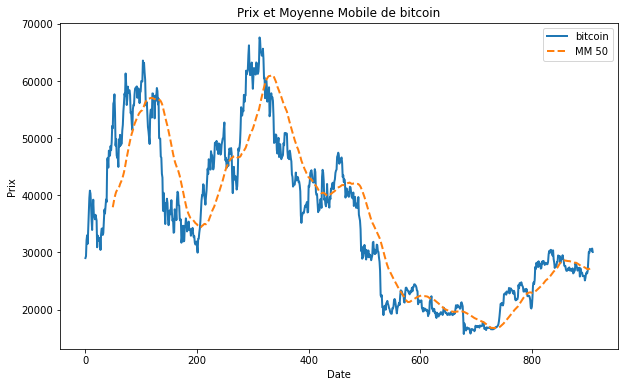

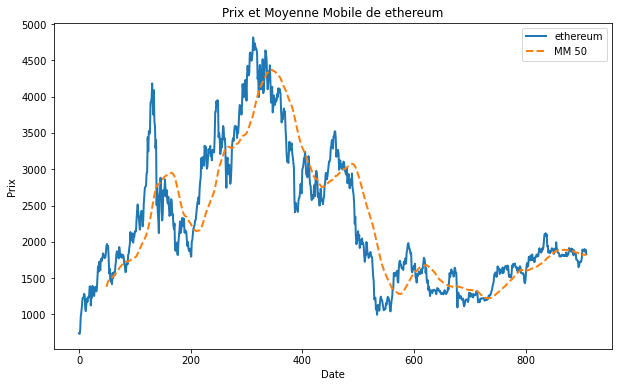

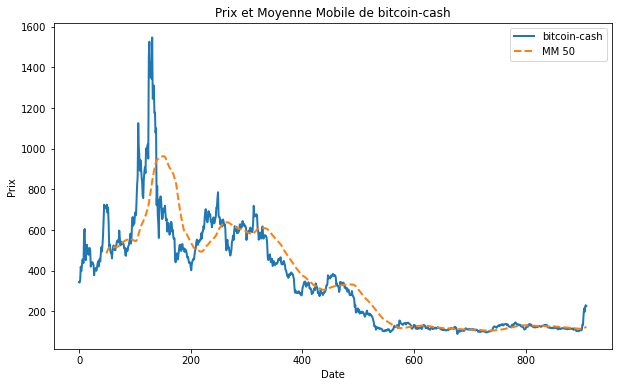

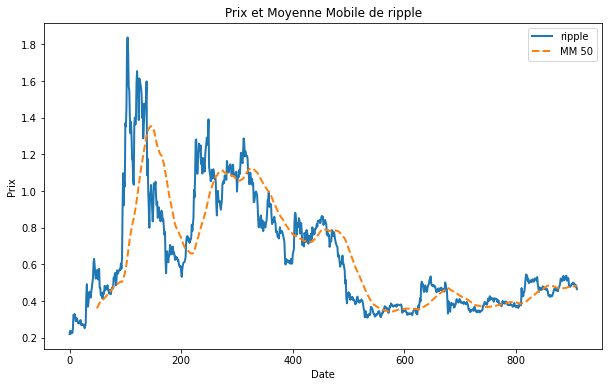

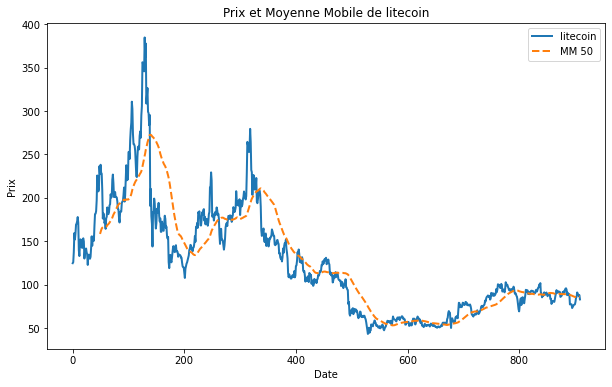

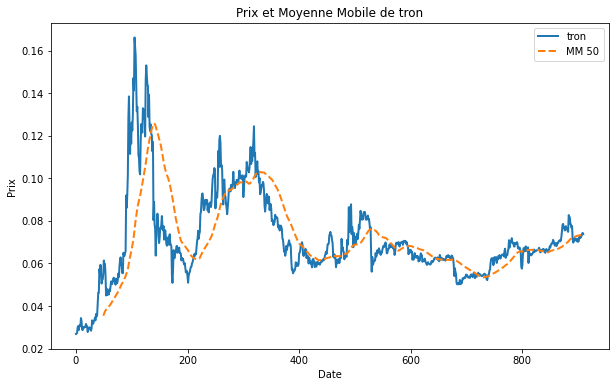

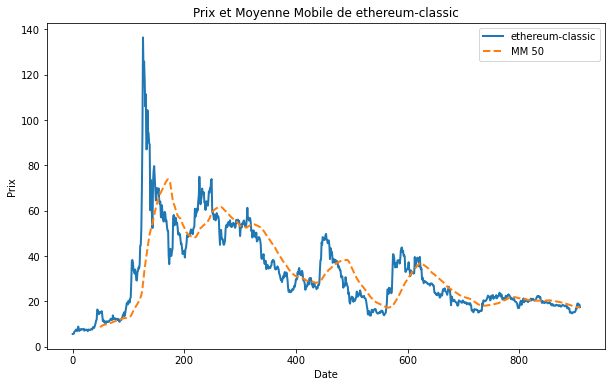

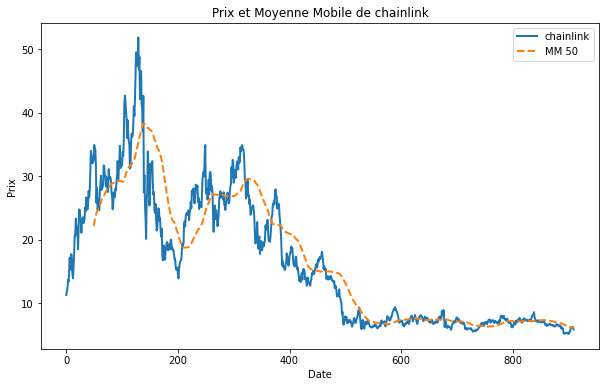

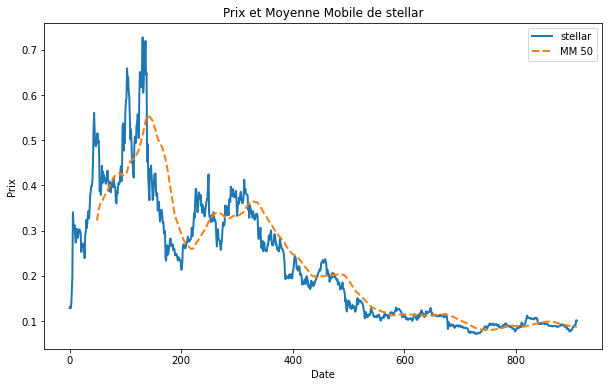

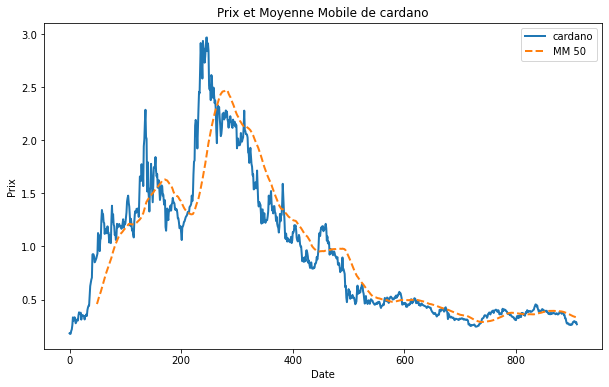

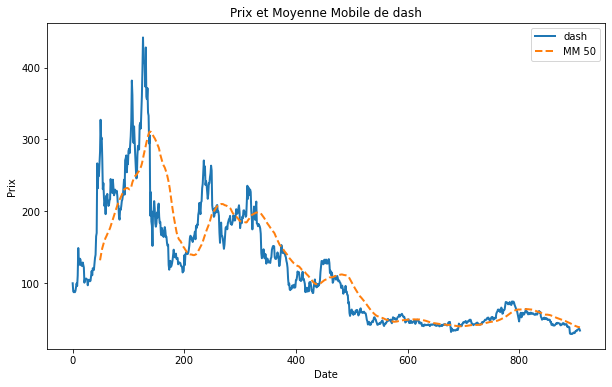

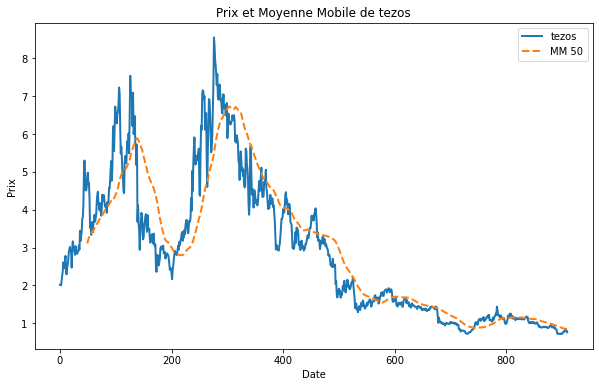

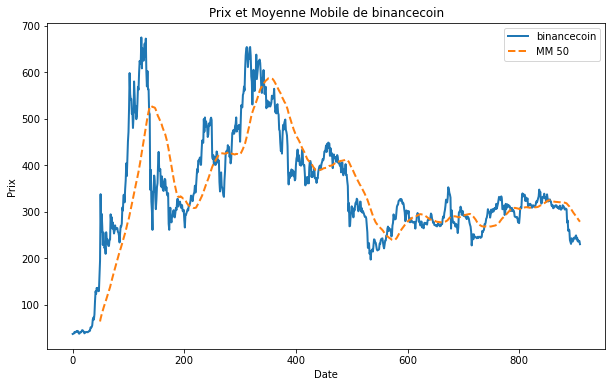

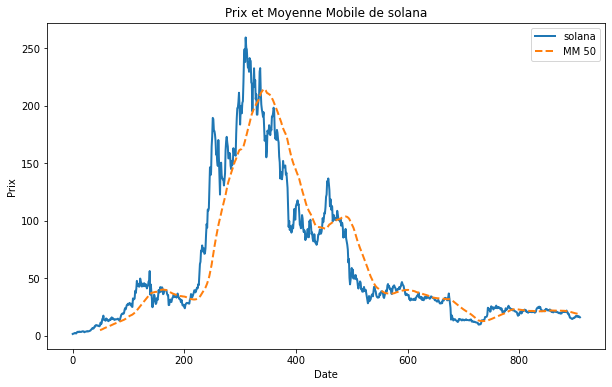

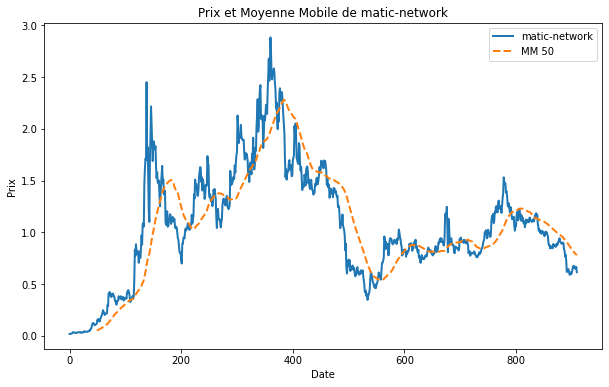

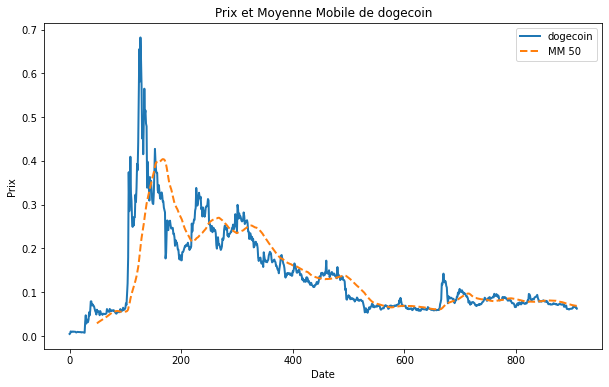

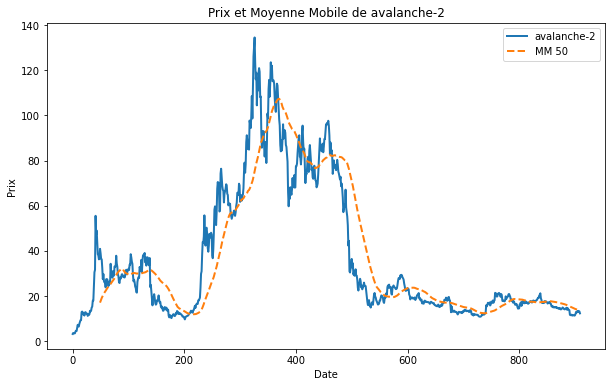

In [589]:
# Paramètres de la moyenne mobile
fenetre_moyenne_mobile = 50

# Boucle sur toutes les colonnes (cryptomonnaies) du DataFrame
for actif in Prix.columns:
    prix_actif = Prix[actif]
    
    # Calculer la moyenne mobile
    moyenne_mobile = prix_actif.rolling(window=fenetre_moyenne_mobile).mean()

    # Créer une figure pour chaque cryptomonnaie
    plt.figure(figsize=(10, 6))
    
    # Tracer le prix et la moyenne mobile
    plt.plot(prix_actif, label=actif, linewidth=2)
    plt.plot(moyenne_mobile, label=f'MM {fenetre_moyenne_mobile}', linestyle='--', linewidth=2)

    # Ajouter des titres et des légendes
    plt.title(f'Prix et Moyenne Mobile de {actif}')
    plt.xlabel('Date')
    plt.ylabel('Prix')
    plt.legend()
    
    # Afficher le graphique
    plt.show()

In [590]:
# Paramètres de la moyenne mobile (à ajuster selon vos besoins)
fenetre_moyenne_mobile = 50
MA = pd.DataFrame(prix_actif.rolling(window=fenetre_moyenne_mobile).mean())

for nom in nomsColonnes:
    rdt_actif = dfrdt[nom]
    moyenne_mobilerdt = rdt_actif.rolling(window=fenetre_moyenne_mobile).mean()
    MArdt[nom] = pd.DataFrame(moyenne_mobilerdt)
#Supression des bonnes valeurs
MArdt.dropna()

,bitcoin,ethereum,bitcoin-cash,ripple,litecoin,tron,ethereum-classic,chainlink,stellar,cardano,dash,tezos,binancecoin,solana,matic-network,dogecoin,avalanche-2
49,0.013159,0.019620,0.014930,0.019010,0.012920,0.016537,0.019957,0.022637,0.027775,0.032683,0.023787,0.018075,0.044034,0.040425,0.043784,0.049348,0.049933
50,0.013054,0.019434,0.013916,0.015589,0.011910,0.015423,0.019586,0.021210,0.026295,0.037150,0.024438,0.016945,0.038309,0.033933,0.042041,0.045962,0.045885
51,0.011678,0.018297,0.013889,0.018189,0.010079,0.015672,0.019996,0.020619,0.027152,0.036488,0.024874,0.017068,0.040850,0.036378,0.042759,0.033502,0.046732
52,0.009996,0.012300,0.008166,0.018741,0.005395,0.012147,0.014979,0.016832,0.024716,0.033654,0.022439,0.014050,0.037542,0.038089,0.040574,0.033381,0.044769
53,0.008701,0.008437,0.005142,0.014023,0.002947,0.007709,0.010072,0.013201,0.017284,0.029479,0.019463,0.008853,0.034891,0.036681,0.035152,0.031996,0.041151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,0.000678,-0.001226,0.011540,0.000791,0.000187,0.000308,-0.000472,-0.003253,-0.000861,-0.006183,-0.006561,-0.004396,-0.006469,-0.006327,-0.008429,-0.003725,-0.005783
905,0.001056,-0.000013,0.010426,0.001243,0.001100,0.000760,-0.000672,-0.002427,-0.000235,-0.005281,-0.004997,-0.003598,-0.006027,-0.005191,-0.007640,-0.002853,-0.004273
906,0.001137,-0.000377,0.013072,0.001124,0.000800,0.001189,-0.000229,-0.002693,-0.000096,-0.005963,-0.004790,-0.003867,-0.006219,-0.006019,-0.008115,-0.003468,-0.004533
907,0.002055,0.000436,0.014493,0.002396,0.002437,0.001671,0.000423,-0.001224,0.002583,-0.004915,-0.002878,-0.002462,-0.005581,-0.004368,-0.006095,-0.002033,-0.003105


In [594]:
moyenne_mobilerdt = dfrdt.rolling(window=fenetre_moyenne_mobile).mean()
MArdt = pd.DataFrame(moyenne_mobilerdt)
MArdt.dropna()
# Fonction pour appliquer le style
def style_top3(MArdt):
    is_top3 = MArdt.isin(MArdt.nlargest(3))
    is_bottom3 = MArdt.isin(MArdt.nsmallest(3))
    
    styles = ['' for _ in range(len(MArdt))]
    
    for i, (top, bottom) in enumerate(zip(is_top3, is_bottom3)):
        if top:
            styles[i] = 'background-color: lightgreen'
        elif bottom:
            styles[i] = 'background-color: lightcoral'

    return styles

# Appliquer le style
MArdt = MArdt.style.apply(style_top3, axis=1)

# Afficher le DataFrame stylisé
MArdt

,bitcoin,ethereum,bitcoin-cash,ripple,litecoin,tron,ethereum-classic,chainlink,stellar,cardano,dash,tezos,binancecoin,solana,matic-network,dogecoin,avalanche-2
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [597]:
# Calcul du momentum (par exemple, rendement sur les 90 derniers jours)

momentum = dfrdt.rolling(window=90).mean()  # Fenêtre de 90 jours

# Sélectionner les actifs avec le meilleur momentum
top_momentum_actifs = momentum.iloc[-1].nlargest(5).index  # Top 5 actifs

# Construire un portefeuille basé sur le momentum
# Pour simplifier, on prend des positions égales pour chaque actif
portfolio_momentum = pd.Series(1, index=top_momentum_actifs)

# Identifier les actifs pour les positions longues et courtes
long_positions = momentum.iloc[-1].nlargest(5).index  # Top 5 actifs
short_positions = momentum.iloc[-1].nsmallest(5).index  # Bottom 5 actifs

# Construire le portefeuille long-short
# Pour simplifier, on prend des positions égales pour chaque actif
portfolio_longshort = pd.Series(1, index=long_positions).append(pd.Series(-1, index=short_positions))


bitcoin-cash     1
tron             1
bitcoin          1
ethereum         1
stellar          1
matic-network   -1
dash            -1
tezos           -1
cardano         -1
avalanche-2     -1
dtype: int64

In [603]:
# Fenêtres pour court, moyen et long terme
fenetres = {'Court Terme': 20, 'Moyen Terme': 50, 'Long Terme': 200}

# Dictionnaires pour stocker les résultats
top_momentum_actifs = {}
bottom_momentum_actifs = {}
portfolios_momentum = {}
portfolios_longshort = {}

for terme, fenetre in fenetres.items():
    # Calcul du momentum
    momentum = dfrdt.rolling(window=fenetre).mean()

    # Top et bottom 5 actifs
    top_actifs = momentum.iloc[-1].nlargest(5).index
    bottom_actifs = momentum.iloc[-1].nsmallest(5).index

    # Stocker les résultats
    top_momentum_actifs[terme] = top_actifs
    bottom_momentum_actifs[terme] = bottom_actifs

    # Portefeuille basé sur le momentum
    portfolios_momentum[terme] = pd.Series(1, index=top_actifs)

    # Portefeuille long-short
    portfolio_longshort = pd.Series(1, index=top_actifs).append(pd.Series(-1, index=bottom_actifs))
    portfolios_longshort[terme] = portfolio_longshort

# Créer des DataFrames à partir des dictionnaires
df_top_momentum_actifs = pd.DataFrame(top_momentum_actifs)
df_bottom_momentum_actifs = pd.DataFrame(bottom_momentum_actifs)
df_portfolios_momentum = pd.DataFrame(portfolios_momentum)
df_portfolios_longshort = pd.DataFrame(portfolios_longshort)

# Affichage des résultats
print("Top Momentum Actifs par Terme:")
print(df_top_momentum_actifs)

print("\nBottom Momentum Actifs par Terme:")
print(df_bottom_momentum_actifs)

print("\nPortfolios Momentum par Terme:")
print(df_portfolios_momentum)

print("\nPortfolios Long-Short par Terme:")
print(df_portfolios_longshort)

Top Momentum Actifs par Terme:
        Court Terme   Moyen Terme    Long Terme
0      bitcoin-cash  bitcoin-cash  bitcoin-cash
1           stellar       stellar       bitcoin
2           bitcoin       bitcoin      ethereum
3  ethereum-classic        ripple          tron
4          ethereum          tron        ripple

Bottom Momentum Actifs par Terme:
     Court Terme    Moyen Terme     Long Terme
0  matic-network  matic-network       dogecoin
1        cardano        cardano  matic-network
2         solana    binancecoin           dash
3           dash         solana          tezos
4    binancecoin    avalanche-2    binancecoin

Portfolios Momentum par Terme:
                  Court Terme  Moyen Terme  Long Terme
bitcoin                   1.0          1.0         1.0
bitcoin-cash              1.0          1.0         1.0
ethereum                  1.0          NaN         1.0
ethereum-classic          1.0          NaN         NaN
ripple                    NaN          1.0         1.0
st

Top Momentum Actifs par Terme
Court Terme: On observe que 'bitcoin-cash', 'stellar', et 'bitcoin' figurent parmi les cryptomonnaies avec le plus fort momentum. Cela indique qu'ils ont eu des performances relativement meilleures dans la période récente (20 jours).
Moyen Terme: 'bitcoin-cash', 'stellar', et 'bitcoin' se maintiennent comme actifs à fort momentum sur une période de 50 jours, montrant une tendance constante dans leur performance.
Long Terme: Sur 200 jours, 'bitcoin-cash' continue de montrer un fort momentum, mais 'ethereum' et 'ripple' émergent aussi comme des actifs performants.
Bottom Momentum Actifs par Terme
Court Terme: 'matic-network', 'cardano', et 'solana' sont parmi les actifs avec le pire momentum. Cela pourrait indiquer une période récente de sous-performance ou de volatilité.
Moyen Terme: 'matic-network' et 'cardano' restent en bas de la liste, indiquant une tendance négative persistante.
Long Terme: 'dogecoin', 'matic-network', et 'dash' apparaissent comme des actifs à faible momentum sur une période plus longue.
Portefeuilles Momentum
Court Terme: Les actifs sélectionnés sont principalement les mêmes que ceux identifiés comme ayant le meilleur momentum à court terme.
Moyen et Long Terme: Les portefeuilles se diversifient un peu plus, avec des actifs comme 'ripple' et 'tron' apparaissant dans le portefeuille à moyen terme et 'ethereum' conservant sa place dans le portefeuille à long terme.
Portefeuilles Long-Short
Les portefeuilles long-short montrent une combinaison d'investissements dans les actifs à fort momentum (long) et de paris contre ceux à faible momentum (short).
Sur tous les termes, 'bitcoin' et 'bitcoin-cash' sont constamment choisis pour des positions longues, tandis que 'binancecoin' et 'matic-network' apparaissent fréquemment dans des positions courtes.
Intéressant de noter, certains actifs comme 'ethereum' et 'tron' apparaissent dans des positions longues pour certains termes et sont absents dans d'autres, suggérant une variation dans leur performance relative en fonction de la période considérée.

### Analyse des Résultats

#### Top Momentum Actifs par Terme
- **Court Terme**: 'bitcoin-cash', 'stellar', et 'bitcoin' montrent un momentum élevé, indiquant des performances supérieures récentes.
- **Moyen Terme**: Les mêmes actifs ('bitcoin-cash', 'stellar', 'bitcoin') continuent d'afficher un fort momentum.
- **Long Terme**: 'bitcoin-cash' reste en tête, avec 'ethereum' et 'ripple' montrant également une bonne performance.

#### Bottom Momentum Actifs par Terme
- **Court Terme**: 'matic-network', 'cardano', et 'solana' affichent le pire momentum.
- **Moyen Terme**: 'matic-network' et 'cardano' maintiennent une tendance négative.
- **Long Terme**: 'dogecoin', 'matic-network', et 'dash' émergent comme les actifs les moins performants.

#### Portefeuilles Momentum
- **Court Terme**: Principalement composé d'actifs ayant le meilleur momentum à court terme.
- **Moyen et Long Terme**: Plus de diversification avec 'ripple' et 'tron' apparaissant à moyen terme, et 'ethereum' restant à long terme.

#### Portefeuilles Long-Short
- Positions longues constantes sur 'bitcoin' et 'bitcoin-cash', tandis que 'binancecoin' et 'matic-network' apparaissent souvent en short.
- Variabilité dans la performance relative de certains actifs comme 'ethereum' et 'tron' selon la période.

### Implications pour la Stratégie d'Investissement
- **Diversification Temporelle**: L'importance d'examiner des horizons temporels variés dans la construction de portefeuilles.
- **Surveillance des Tendances**: 'bitcoin-cash' et 'bitcoin' montrent une tendance haussière constante, alors que 'matic-network' indique une tendance baissière.
- **Stratégie de Trading**: Une approche équilibrée pourrait être d'investir long sur les actifs à momentum positif et court sur ceux à momentum négatif pour gérer les risques.
